<a href="https://colab.research.google.com/github/aalfonso89/codespaces-jupyter/blob/main/Desafio_CrossValidation_ALFONSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto Data Science - Alberto Alfonso**

**PARTE 1**

**Visualizaciones**

Este dataset cuenta con las ventas realizadas por una compañias de seguros en el año 2020, 2021 y 2022. Contando con diferentes datos de la venta, se planteará un modelo de regresión para que, brindando distintos parámetros, se pueda obtener el importe de la póliza de forma rápida y con pocos datos.
Las variables que considero dependientes para poder relacionar con el importe de la póliza son:
- Producto
- Edad del tomador
- Sexo del tomador
- Tipo de persona del tomador
- Cantidad de asegurados

A partir de esos datos, se intentará obtener el importe de la póliza.

Como preguntas problema relacionadas con las variables, es interesante saber cuan dependiente es cada una del precio de la póliza, cuál es la mas relacionada con el precio de la póliza y si existe alguna combinacion de variables que marque alguna tendencia.

Se planteó poder modificar el dataset para poder incorporar algun dato más que pueda inferir el premio, pero por el momento no lo modifiqué.

In [1]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Archivos DataScience/ventas2020-2022A.csv',sep=';', on_bad_lines='skip')
df


,PRODUCTO,OPERACIÓN,CODIGO TOMADOR,NOMBRE TOMADOR,CODIGO DE PRODUCTOR,FECHA DE EMISION,FECHA INICIO VIGENCIA,FECHA FIN VIG,DURACION DE POLIZA,PRODUCTO ANTERIOR,...,MEDIO DE PAGO,PREMIO,CANTIDAD DE ASEGURADOS,TIPO DE PERSONA,FECHA NACIMIENTO,SEXO,TIPO DOC,NRO DOC,DOMICILIO,TELEFONO
0,125,17945,26016,GRANATA MARIA | 023432918,1,31/7/2020,1/8/2020,31/7/2021,12,125,...,5,2.20,1,F,3/9/1920,2,2.0,3.432918e+06,NaN,NaN
1,125,18271,26016,GRANATA MARIA | 023432918,1,31/7/2021,1/8/2021,31/7/2022,12,125,...,5,2.20,1,F,3/9/1920,2,2.0,3.432918e+06,NaN,NaN
2,125,18573,26016,GRANATA MARIA | 023432918,1,31/7/2022,1/8/2022,31/7/2023,12,125,...,5,2.31,1,F,3/9/1920,2,2.0,3.432918e+06,NaN,NaN
3,157,59116,190336,RUVIDAL RAQUEL RENEE CAPITAL FEDERALF\r | 041...,343,30/4/2020,1/5/2020,1/5/2021,12,157,...,5,71.29,1,F,3/9/1922,1,4.0,1.184000e+05,AV CORDOBA 1674 0 - (1000) 1000 - CAP - ARG,NaN
4,157,66789,190336,RUVIDAL RAQUEL RENEE CAPITAL FEDERALF\r | 041...,343,30/4/2021,1/5/2021,1/5/2022,12,157,...,5,71.27,1,F,3/9/1922,2,4.0,1.184000e+05,AV CORDOBA 1674 0 - (1000) 1000 - CAP - ARG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79954,208,92,2857,INST.DE VIV.DE LA FUERZA AEREA (IVIFA) | 20305...,1,30/9/2022,1/10/2022,30/9/2023,12,208,...,4,644.50,1,J,1000-01-01,0,20.0,3.058481e+10,AVDA.PTE.GRAL.J.A.ROCA 636 1 - (1067) CAPITAL...,1143435961
79955,208,93,2857,INST.DE VIV.DE LA FUERZA AEREA (IVIFA) | 20305...,1,30/9/2022,1/10/2022,30/9/2023,12,208,...,4,157328.50,1,J,1000-01-01,0,20.0,3.058481e+10,AVDA.PTE.GRAL.J.A.ROCA 636 1 - (1067) CAPITAL...,1143435961
79956,228,195,59982,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,6/2/2020,7/2/2020,31/5/2020,999,0,...,4,4922.25,3,J,1000-01-01,0,20.0,3.052752e+10,Av. Cordoba 1674 - (10190) CAPITAL FEDERAL -...,1141294000
79957,228,1051,59982,SMSV INSTITUCION MUTUALISTA | 2030527516737,1,11/4/2021,12/4/2021,11/7/2021,3,0,...,8,9793.76,4,J,1000-01-01,0,20.0,3.052752e+10,Av. Cordoba 1674 - (10190) CAPITAL FEDERAL -...,1141294000


Teniendo en cuenta las variables que queremos analizar, debemos generar un dataframe reducido del original,  solo tomando las personas físicas para el analisis.

**Análisis Univariado**

En este gráfico de barras se intenta mostrar una relación entre la edad del tomador de la póliza y el premio acumulado de las mismas para esa edad. Vemos que existe un pico entre los 23 y 26 años para ambos sexos, y luego tiene una tendencia descendente, donde a mayor edad, menor es el premio que acumula.
Podemos ver entonces que en ese rango de 20-30 es donde la compañía encuentra su mejor caudal de premio.

Por otro lado vemos que a partir de los 50 años, se iguala el premio para ambos sexos, mientras que hasta los 50 años el premio es mayor para el sexo masculino (codigo 1).

<ipython-input-2-e1d26d23c3bf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['FECHA NACIMIENTO'] = [datetime.strptime(fecha, '%d/%m/%Y').date() for fecha in df_a['FECHA NACIMIENTO']]
<ipython-input-2-e1d26d23c3bf>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['FECHA DE EMISION'] = [datetime.strptime(fecha, '%d/%m/%Y').date() for fecha in df_a['FECHA DE EMISION']]
<ipython-input-2-e1d26d23c3bf>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

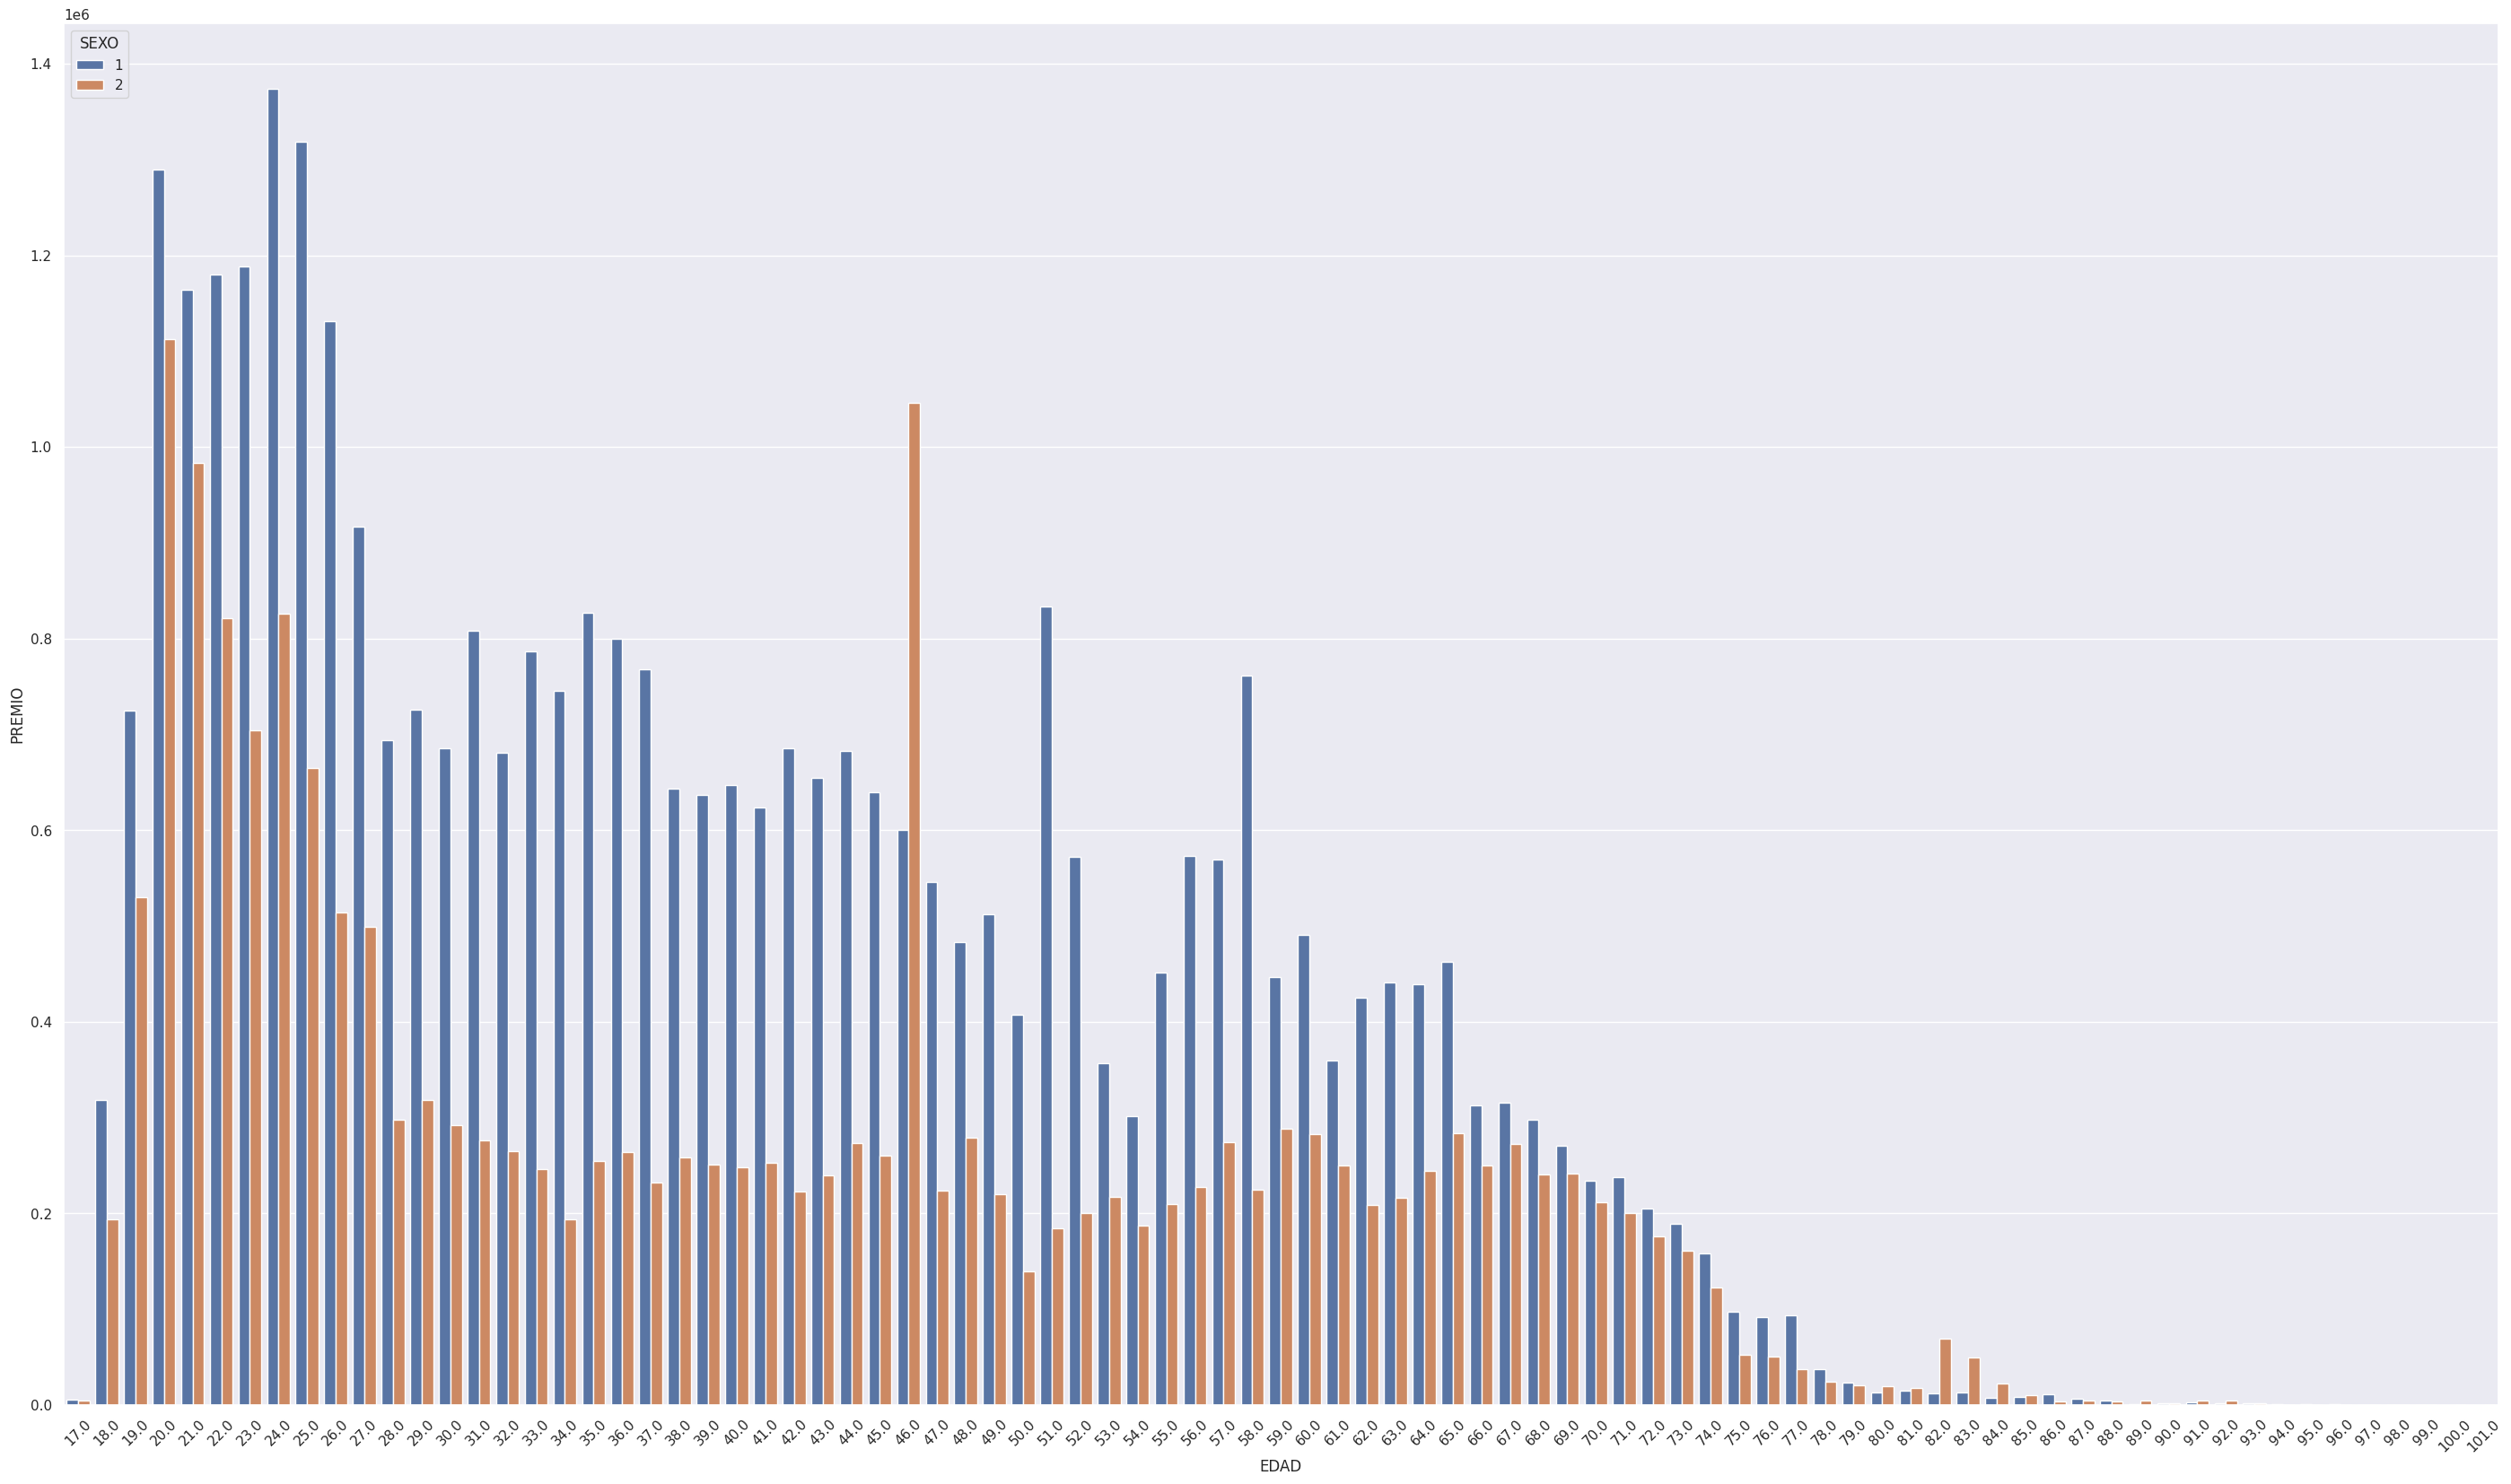

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


df_a=df.loc[df['TIPO DE PERSONA'] == 'F']
df_a['FECHA NACIMIENTO'] = [datetime.strptime(fecha, '%d/%m/%Y').date() for fecha in df_a['FECHA NACIMIENTO']]
df_a['FECHA DE EMISION'] = [datetime.strptime(fecha, '%d/%m/%Y').date() for fecha in df_a['FECHA DE EMISION']]
df_a['EDAD'] = (df_a['FECHA DE EMISION'] - df_a['FECHA NACIMIENTO']).astype('<m8[Y]')

ventas_por_edad_y_sexo = df_a.groupby(['EDAD', 'SEXO'])['PREMIO'].sum().reset_index()
sns.set(rc={'figure.figsize':(35,20)})
sns.barplot(x='EDAD', y='PREMIO', hue='SEXO', data=ventas_por_edad_y_sexo)
plt.xticks(rotation=45)

plt.show()

A continuacion se intenta mostrar en un histograma, la frecuencia de las distintas edades de los tomadores de póliza. Aqui tambien podemos confirmar que entre los 20 y 30 años se dan las mayores ocurrencias, o sea ese rango de edad es el que más clientes tiene

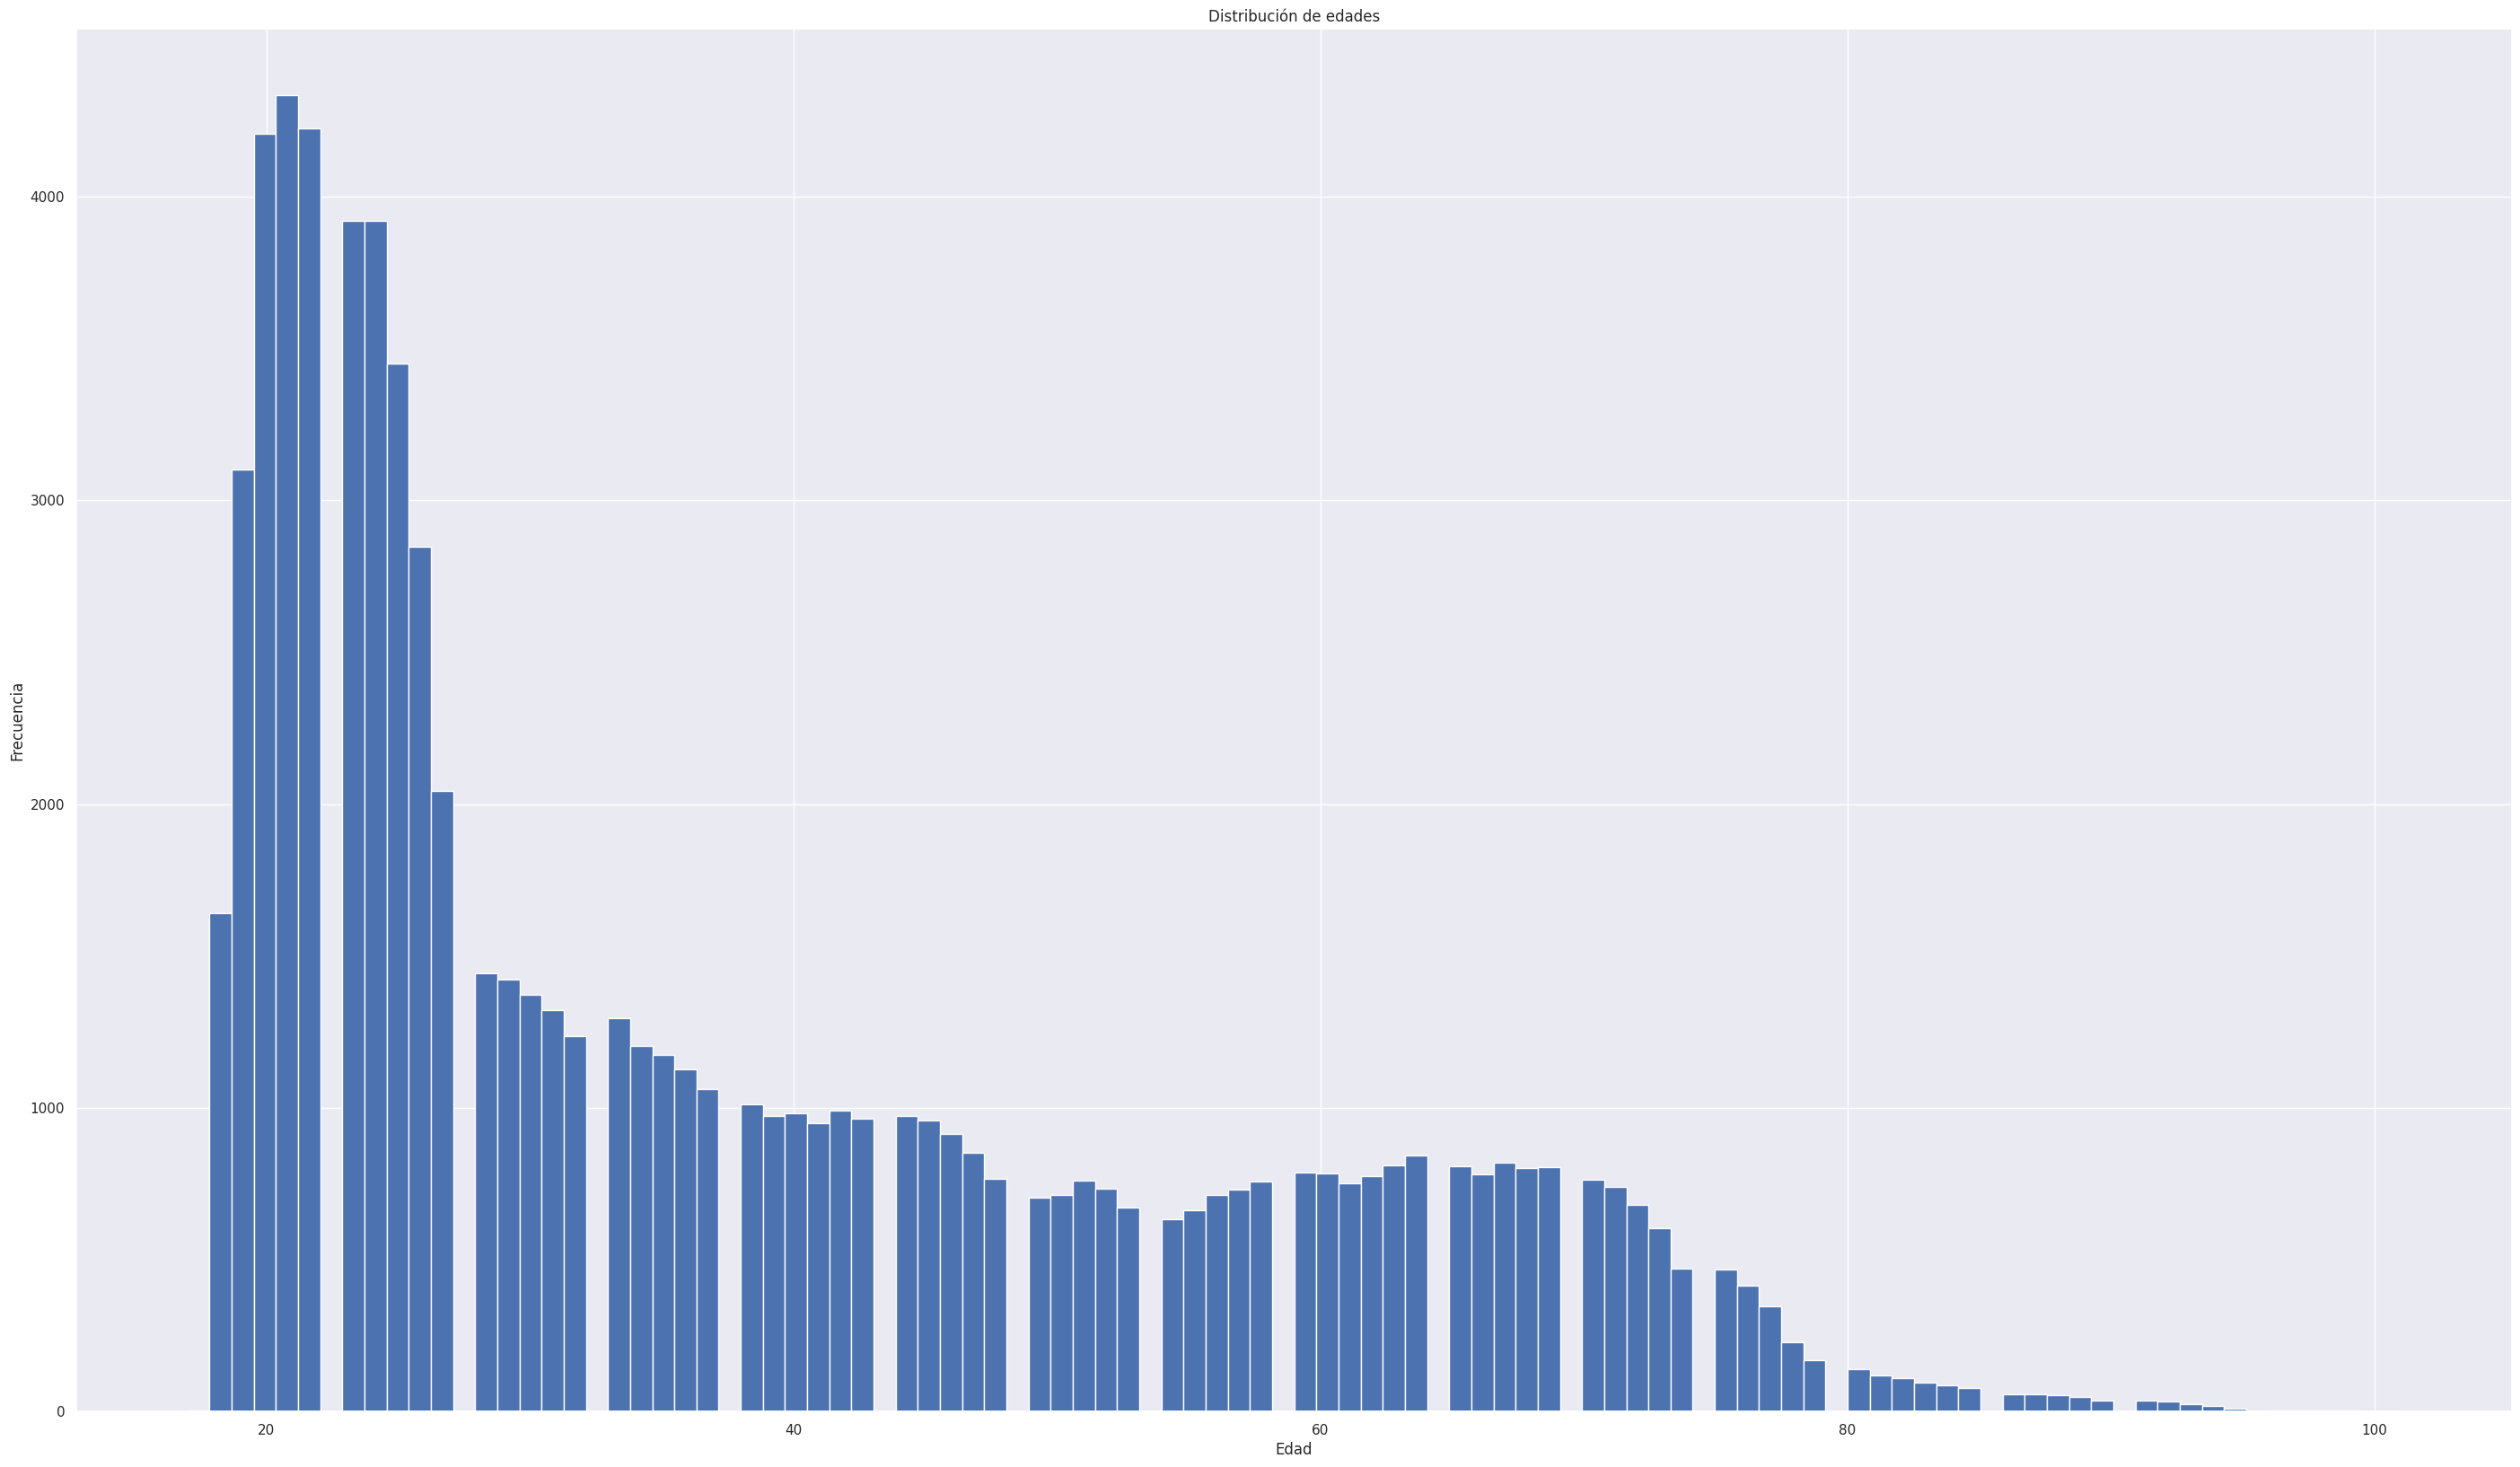

In [3]:
plt.hist(df_a['EDAD'], bins=100)
plt.title('Distribución de edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**Analisis Bivariado**

En este gráfico de dispersión, intento ver si hay muchos casos anómalos. Observo en la dispersión que hay muy pocos casos que salen de la mayoría.

Text(0, 0.5, 'Precio de póliza')

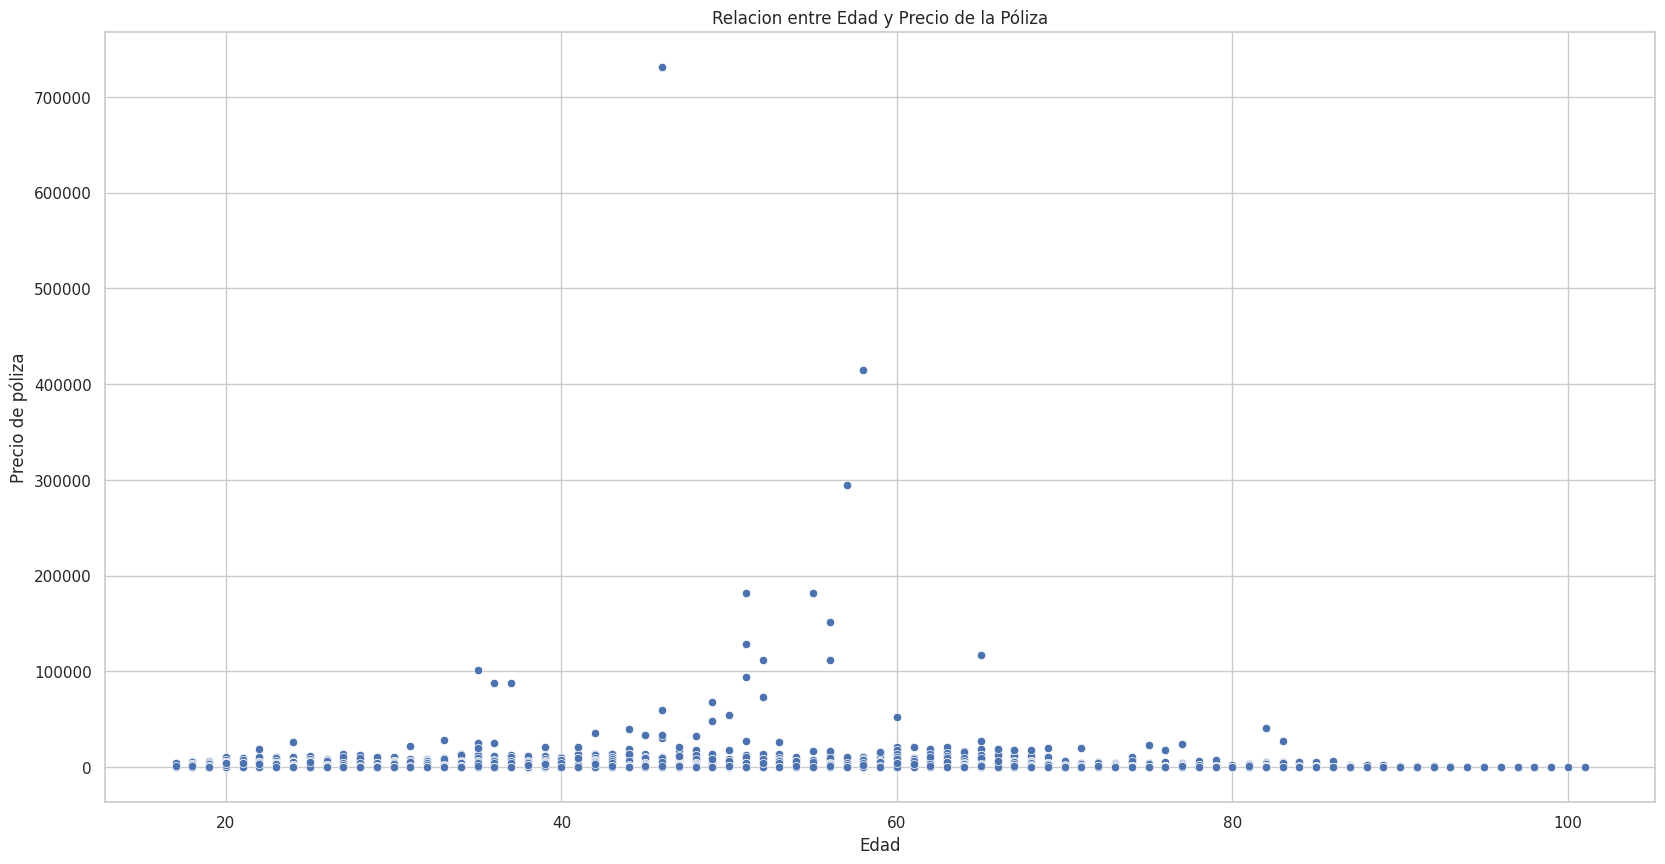

In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
sns.scatterplot(x=df_a.EDAD, y= df_a.PREMIO)
plt.title('Relacion entre Edad y Precio de la Póliza')
plt.xlabel('Edad')
plt.ylabel('Precio de póliza')

Por ultimo, generamos un gráfico de Boxplot para poder comparar la cantidad de asegurados y el sexo del tomador respecto al precio de la póliza. Vemos una distribución pareja entre los sexos y la cantidad de asegurados. Vemos que a medida que hay más asegurados, hay un ascenso esperable en el costo de la póliza hasta 11 asegurados, mirando la zona central del bigote para cada cantidad de asegurados.

Text(0, 0.5, 'Precio de poliza')

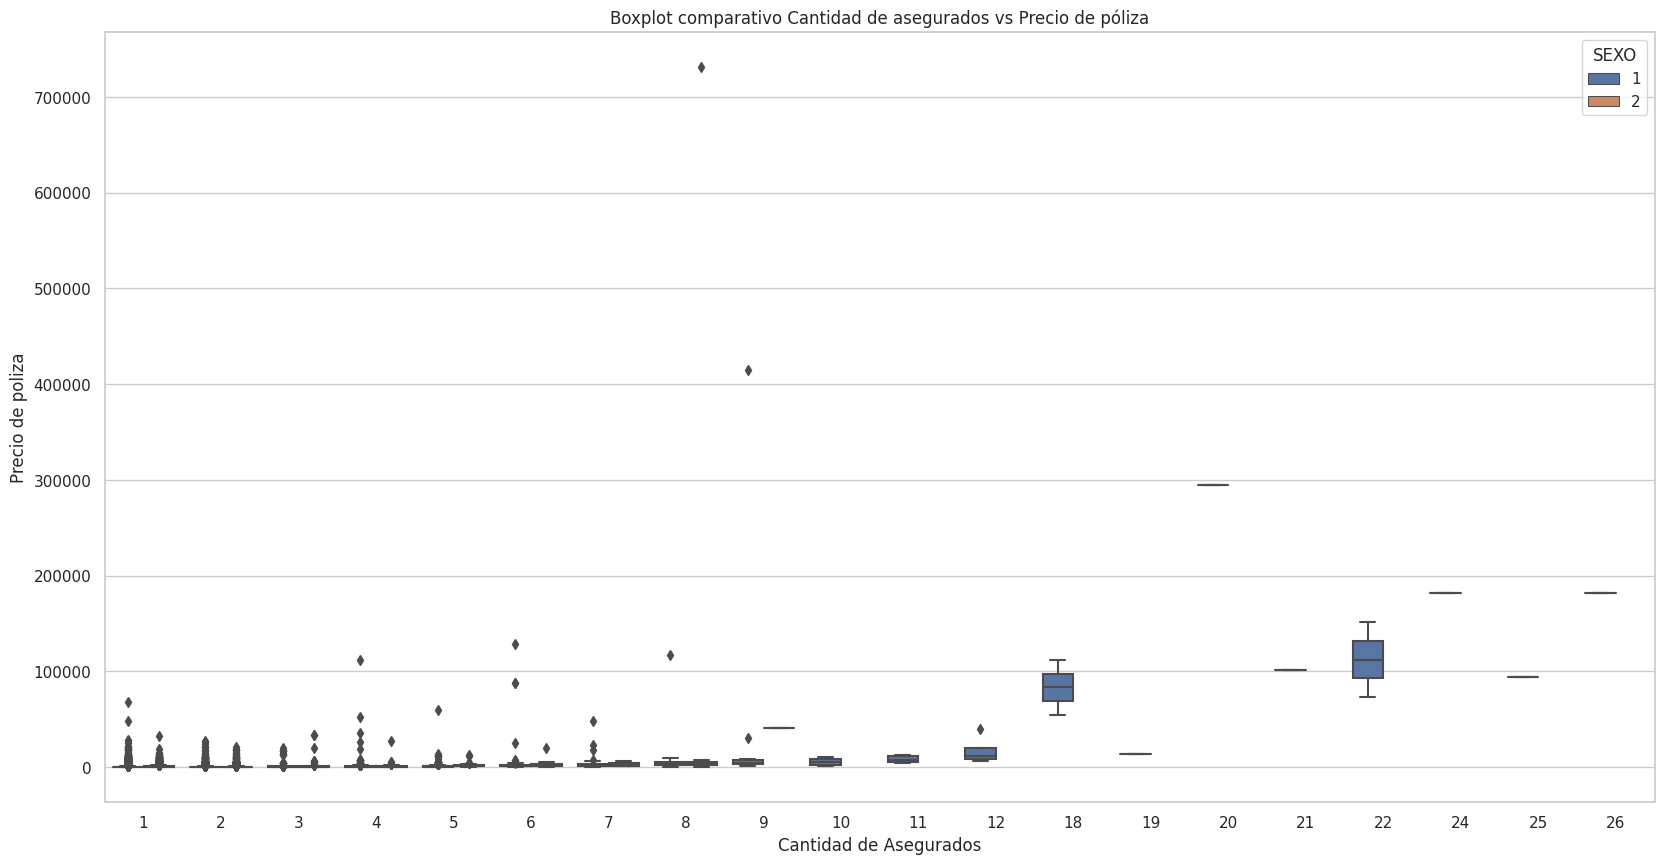

In [5]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df_a['CANTIDAD DE ASEGURADOS'], y= df_a.PREMIO, hue=df_a.SEXO)
plt.title('Boxplot comparativo Cantidad de asegurados vs Precio de póliza')
plt.xlabel('Cantidad de Asegurados')
plt.ylabel('Precio de poliza')

**PARTE 2**

**Contexto Comercial / Problema comercial**

Mi experiencia laboral y trabajo actual esta dentro de la industia del seguro. Trabajo dando servicios a compañías de seguro  de allí proviene mi interés en abordar este rubro.
Al comienzo de este notebook definí el objetivo de este modelo, para poder predecir el importe de una póliza. En las compañías de seguros, estos cálculos muchas veces son engorrosos y siempre necesitan de algún sistema que haga las cotizaciones teniendo en cuenta un monton de variables.
¿que pasaría si esos cálculos pueden evitarse de hacer todas las veces antes cada consulta de cotizacion? Las cotizaciones serían más rápidas, estarían al alcance de más personas (no necesitamos que un actuario defina todo siempre) y requerirían menos recursos.

**Preguntas/Hipótesis que queremos resolver mediante el análisis de datos**

Al principio de este notebook, planteé algunas variables a tener en cuenta para el modelo. ¿Pero, esas variables son todas o puede haber algunas variables más que se podrían tener en cuenta? ¿Hay alguna de las variables que consideré que no es relevante para el modelo? ¿Efectivamente la edad y el sexo son claves para la predicción del premio?



**Análisis exploratorio de datos (EDA)**

Para comenzar con el análisis, para ver cuantas variables hay, ver si hay campos nulos y los tipos de variables de cada campo.
Tenemos 1 nulo en el nombre y muchos nulos en los campos domicilio y teléfono. Esos datos no son relevantes para el análisis que queremos hacer, por lo que estaríamos en condiciones de avanzar.
En nuestro análisis, Premio es la variable dependiente y vemos que esta completa en todos los casos

In [6]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78436 entries, 0 to 78435
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PRODUCTO                 78436 non-null  int64  
 1   OPERACIÓN                78436 non-null  int64  
 2   CODIGO TOMADOR           78436 non-null  int64  
 3   NOMBRE TOMADOR           78435 non-null  object 
 4   CODIGO DE PRODUCTOR      78436 non-null  int64  
 5   FECHA DE EMISION         78436 non-null  object 
 6   FECHA INICIO VIGENCIA    78436 non-null  object 
 7   FECHA FIN VIG            78436 non-null  object 
 8   DURACION DE POLIZA       78436 non-null  int64  
 9   PRODUCTO ANTERIOR        78436 non-null  int64  
 10  OPERACIÓN ANTERIOR       78436 non-null  int64  
 11  PRODUCTO NUEVO           78436 non-null  int64  
 12  OPERACIÓN NUEVA          78436 non-null  int64  
 13  TIPO DE OPERACIÓN        78436 non-null  int64  
 14  GLOBAL RELACIONADA    

Teniendo en cuenta el análisis que queremos hacer, las variables que en primera instancia vamos a analizar son Producto, Edad del tomador, Sexo del tomador
y Cantidad de asegurados.
Con describe, haremos foco en esos datos para observar que el promedio de edad es de 37 años con la particularidad de que los tres primeros cuartiles llegan hasta los 48 años. Eso indica que hay una tendencia a mayor movimiento con edades mas jóvenes ya que el tercer cuartil esta cerca del promedio.
La cantidad de asegurados en la mayoría de los casos es 1

In [7]:
df_a.describe()

,PRODUCTO,OPERACIÓN,CODIGO TOMADOR,CODIGO DE PRODUCTOR,DURACION DE POLIZA,PRODUCTO ANTERIOR,OPERACIÓN ANTERIOR,PRODUCTO NUEVO,OPERACIÓN NUEVA,TIPO DE OPERACIÓN,...,CANTIDAD DE ENDOSOS,DURACION DE FACTURACION,NRO CERTIFICADO,MEDIO DE PAGO,PREMIO,CANTIDAD DE ASEGURADOS,SEXO,TIPO DOC,NRO DOC,EDAD
count,78436.000000,78436.000000,78436.000000,78436.000000,78436.000000,78436.000000,78436.000000,78436.000000,78436.000000,78436.000000,...,78436.000000,78436.000000,78436.000000,78436.000000,78436.000000,78436.000000,78436.000000,78260.000000,7.826000e+04,78436.000000
mean,173.608981,24676.195535,203110.518767,5954.661660,301.088174,96.464506,11214.882694,100.039357,18340.726082,3.596920,...,7.866018,84.186126,18002.092904,4.595237,704.322668,1.663815,1.303853,11.716484,8.251093e+09,38.146438
std,32.452600,18466.926725,101303.158108,23155.254674,449.477095,85.749091,14758.001459,86.081298,20408.290038,1.908857,...,5.132175,275.758992,14826.406391,1.337713,3750.381143,1.272900,0.459923,7.515846,1.102828e+10,18.008108
min,100.000000,1.000000,736.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.729000e+03,17.000000
25%,165.000000,8715.000000,106435.500000,110.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,5.000000,1.000000,4566.750000,5.000000,60.000000,1.000000,1.000000,4.000000,9.267034e+06,23.000000
50%,171.000000,20164.500000,244906.000000,349.000000,12.000000,141.000000,2134.500000,165.000000,11566.500000,5.000000,...,9.000000,1.000000,14196.000000,5.000000,283.010000,1.000000,1.000000,11.000000,3.459557e+07,31.000000
75%,171.000000,40330.250000,280708.000000,354.000000,999.000000,171.000000,19861.000000,171.000000,35090.250000,5.000000,...,11.000000,1.000000,29781.000000,5.000000,788.230000,2.000000,2.000000,21.000000,2.040436e+10,51.000000
max,304.000000,70652.000000,316166.000000,99999.000000,999.000000,303.000000,67208.000000,303.000000,70652.000000,5.000000,...,38.000000,999.000000,49885.000000,10.000000,731016.880000,26.000000,2.000000,30.000000,3.070833e+10,101.000000


En este dataset, la variable que puede oficiar de categórica dentro de las variables relevanetes que quiero analizar, es el producto. No es necesario hacer una conversión en este caso, porque el dato que tengo es el código de ese producto, pero sino debería convertirlo

Haciendo un Hist, vamos a poder observar a simple vista si hay variables que no aportan para poder eliminarlas del dataset, y también observar si hay alguna variable que yo no consideré en mi análisis preliminar, que tal ves pueda aportar y sea relevante para tenerla en cuenta

array([[<Axes: title={'center': 'PRODUCTO'}>,
        <Axes: title={'center': 'OPERACIÓN'}>,
        <Axes: title={'center': 'CODIGO TOMADOR'}>,
        <Axes: title={'center': 'CODIGO DE PRODUCTOR'}>,
        <Axes: title={'center': 'DURACION DE POLIZA'}>],
       [<Axes: title={'center': 'PRODUCTO ANTERIOR'}>,
        <Axes: title={'center': 'OPERACIÓN ANTERIOR'}>,
        <Axes: title={'center': 'PRODUCTO NUEVO'}>,
        <Axes: title={'center': 'OPERACIÓN NUEVA'}>,
        <Axes: title={'center': 'TIPO DE OPERACIÓN'}>],
       [<Axes: title={'center': 'GLOBAL RELACIONADA'}>,
        <Axes: title={'center': 'RAMA'}>,
        <Axes: title={'center': 'POLIZA'}>,
        <Axes: title={'center': 'ENDOSO'}>,
        <Axes: title={'center': 'CANTIDAD DE ENDOSOS'}>],
       [<Axes: title={'center': 'DURACION DE FACTURACION'}>,
        <Axes: title={'center': 'NRO CERTIFICADO'}>,
        <Axes: title={'center': 'MEDIO DE PAGO'}>,
        <Axes: title={'center': 'PREMIO'}>,
        <Axes: t

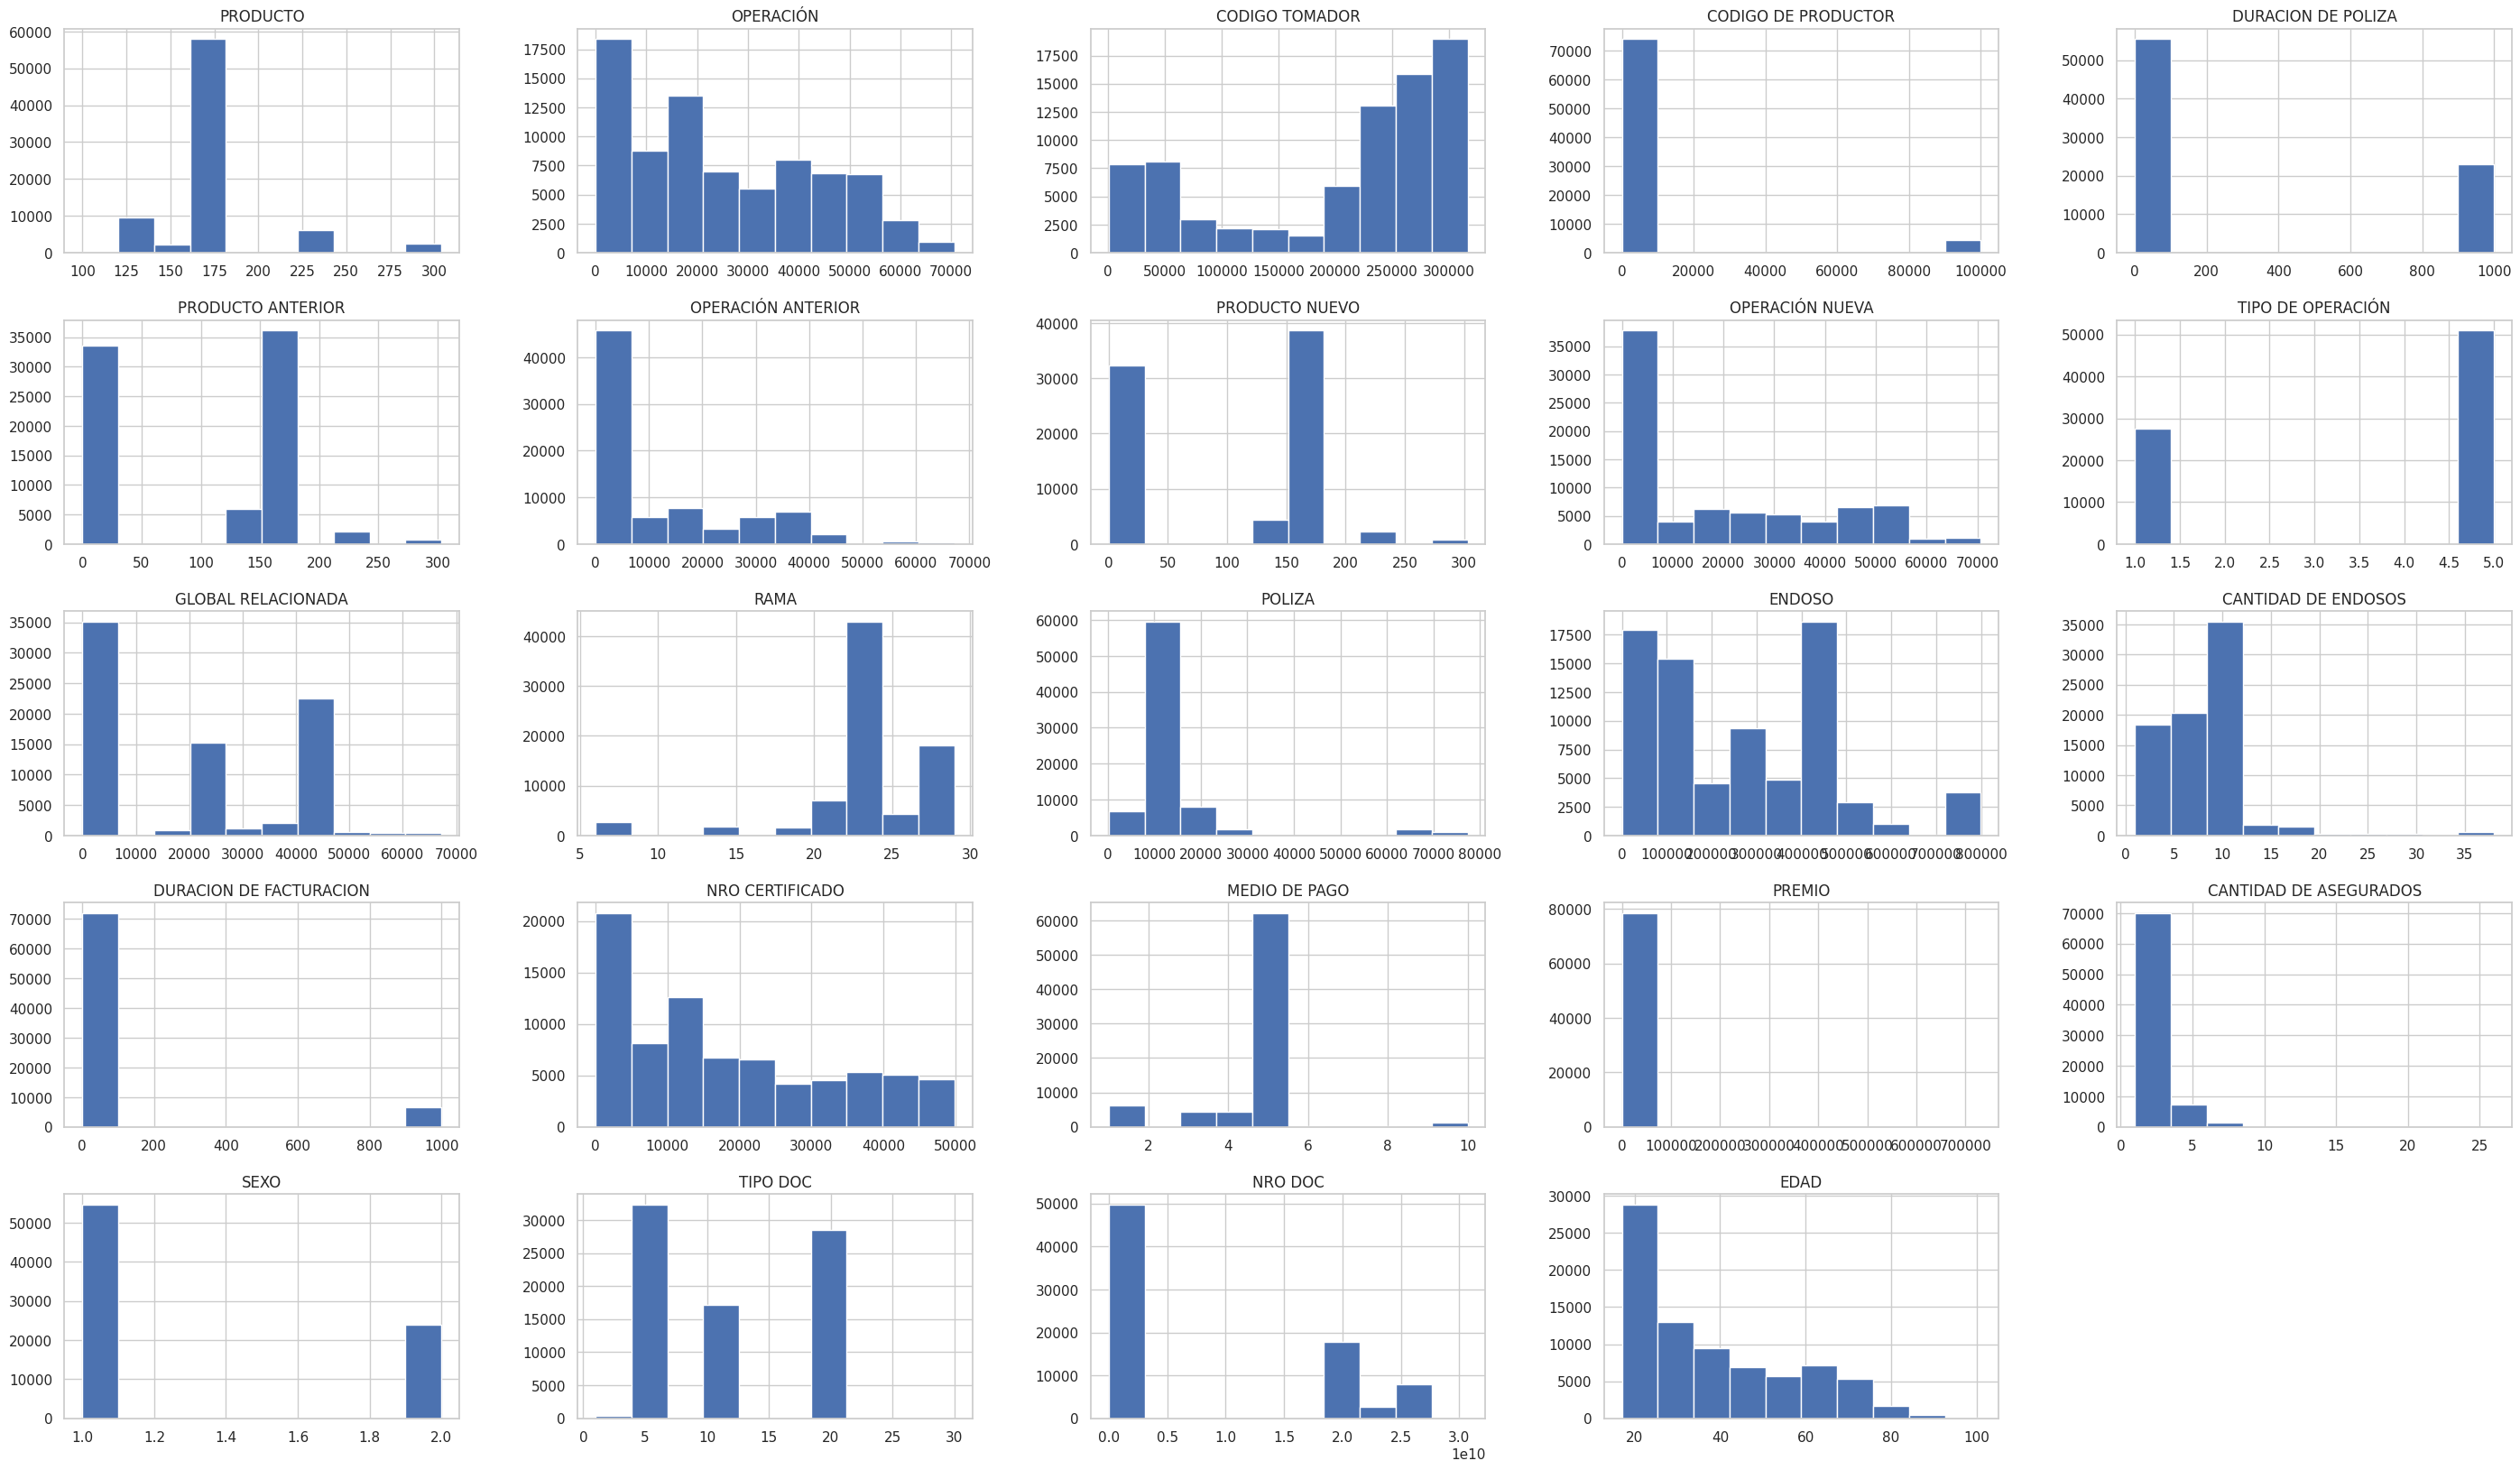

In [8]:
df_a.hist()

A partir de esta vista, podemos ver que Premio sera nuestra variable dependiente, Edad, Sexo y cantidad de asegurados son variables que aportan. Por el conocimiento del negocio, producto será nuestra variable categórica y también aporta a nuestro análisis.
Ahora bien, hay una variable que yo no mencioné hasta ahora que es la duracion de la póliza. Veamos esta variable un poco mas de cerca.

In [9]:
df_a['DURACION DE POLIZA'].unique()

array([ 12, 999,   1,   4,   6,   3])

Segun los datos obtenidos y el conocimiento propio del negocio, 12 es una duracion anual, 999 es una duracion de un periodo corto con una fecha de inicio y de fin bastante próximas.
1 para Mensual, 6 semestral, 3 trimestral y 4 cuatrimestral.

Veamos si esta variable tiene alguna relación con el premio

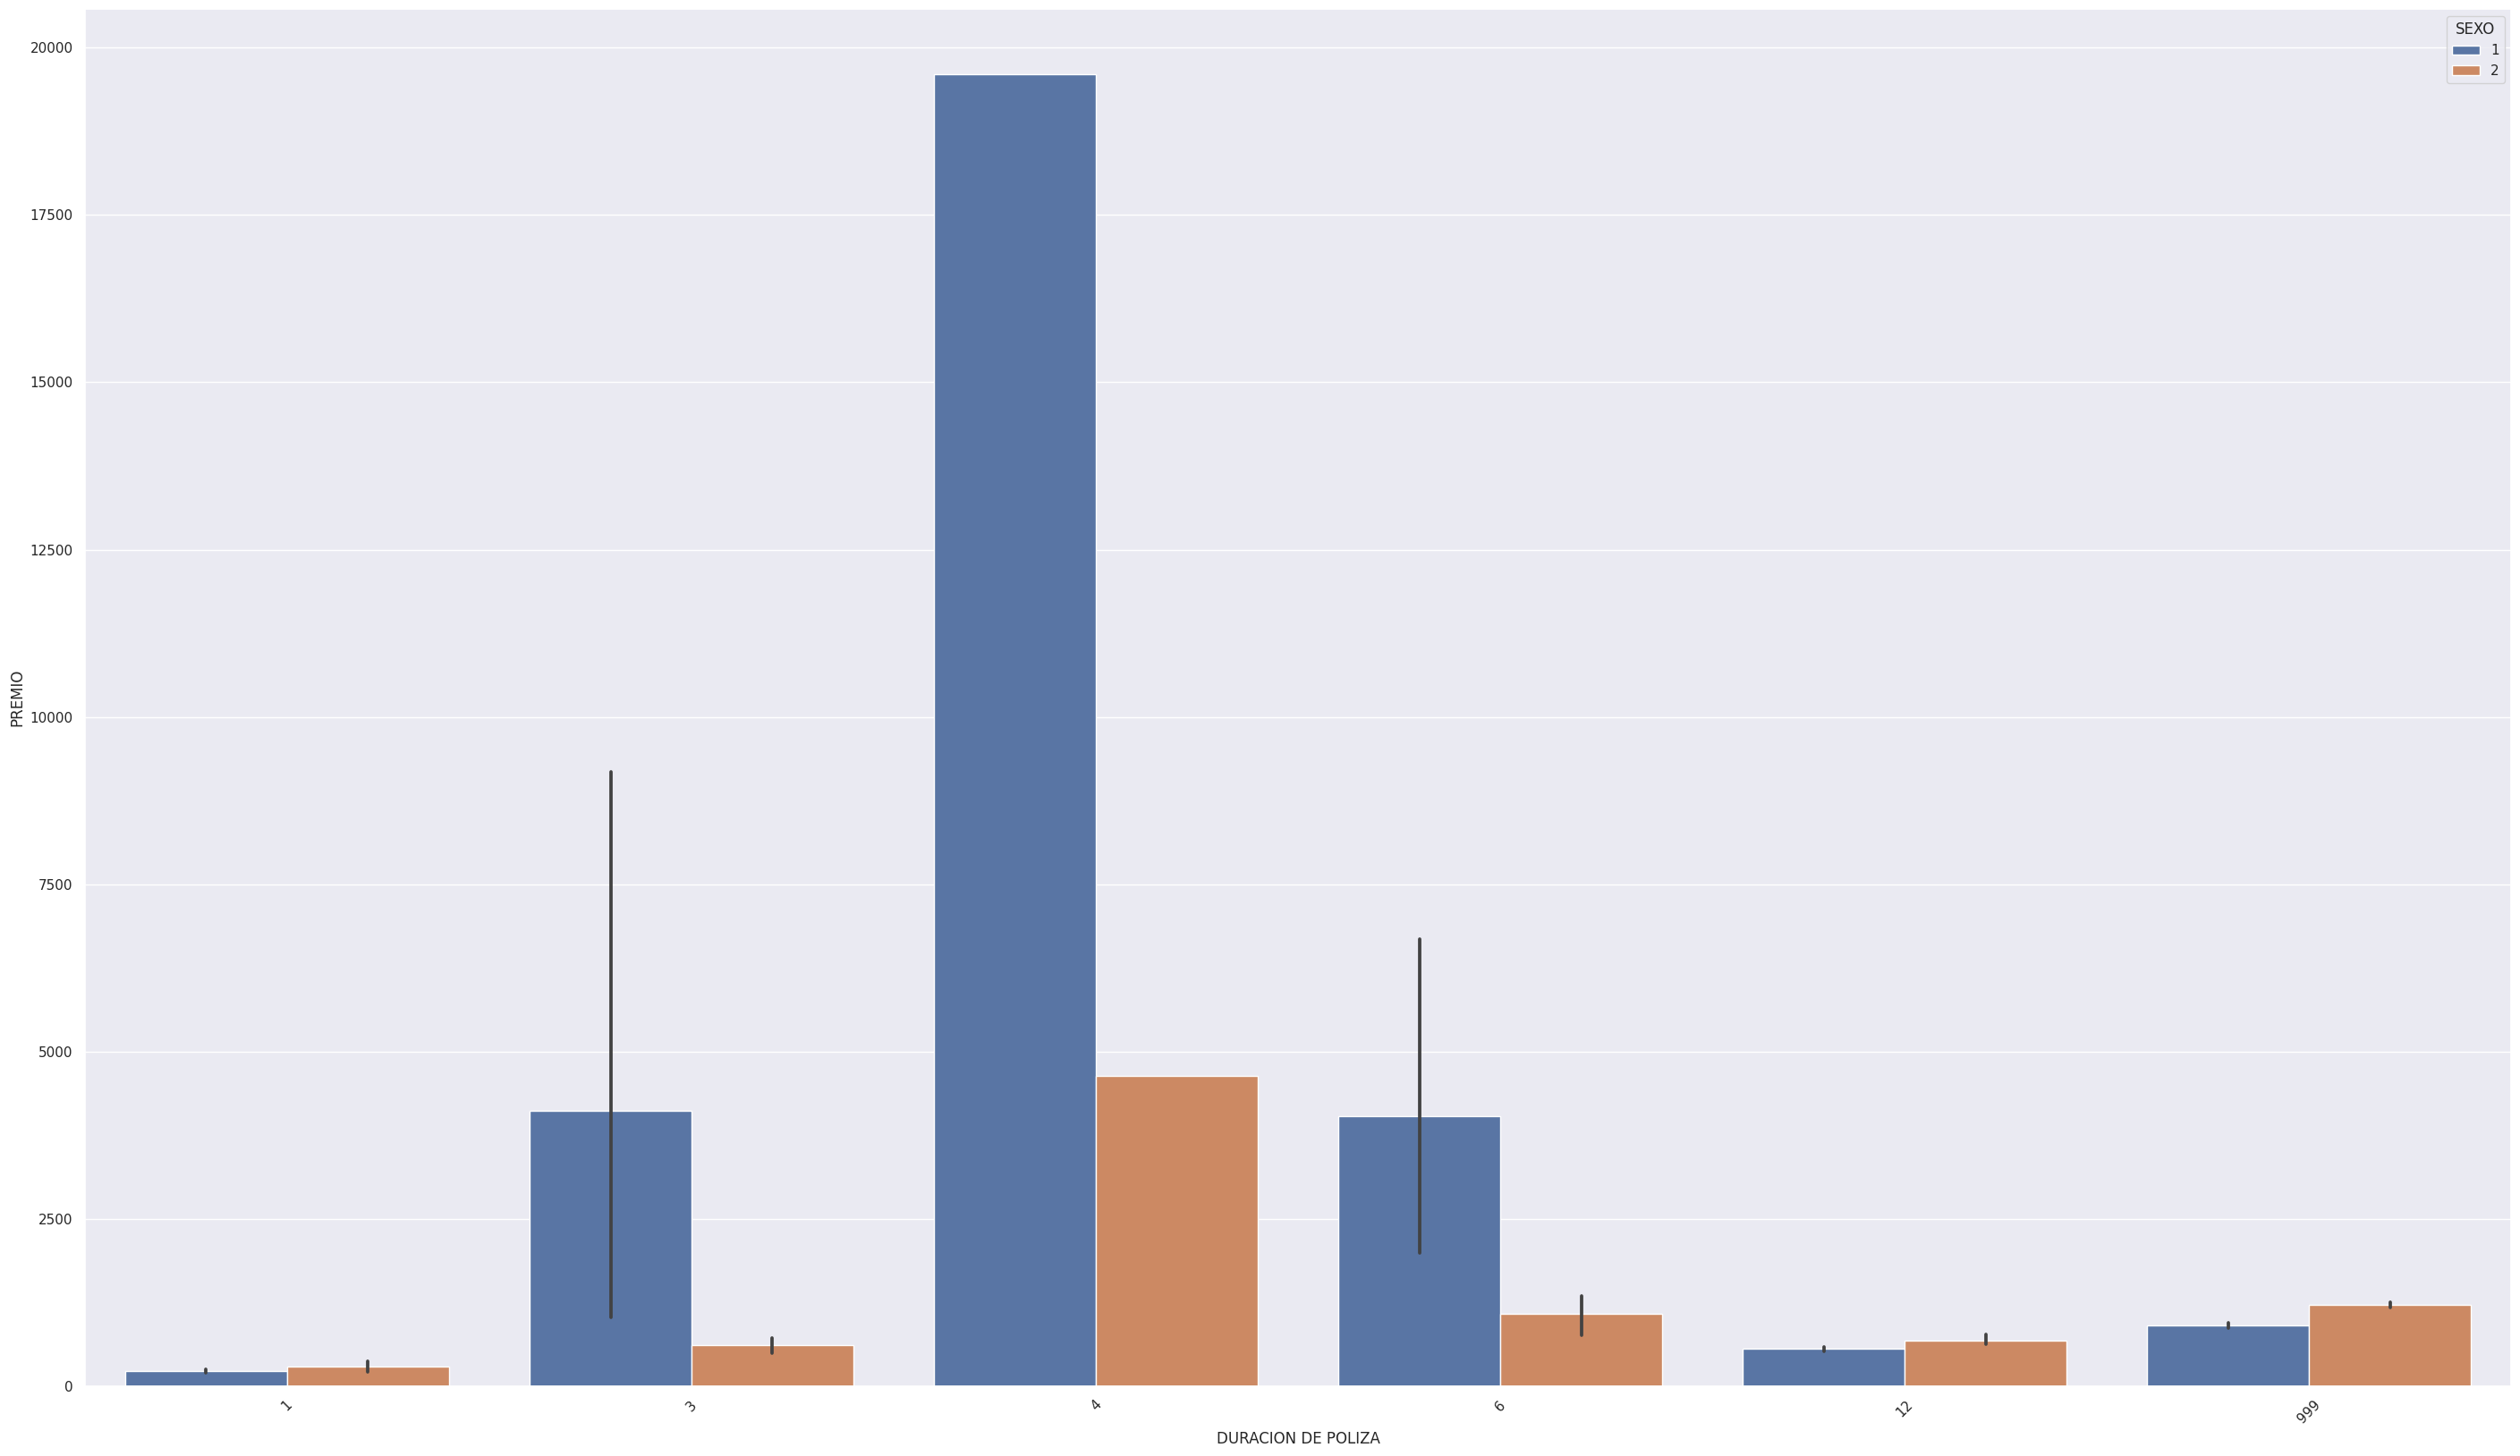

In [10]:
sns.set(rc={'figure.figsize':(35,20)})
sns.barplot(x='DURACION DE POLIZA', y='PREMIO', hue='SEXO', data=df_a)
plt.xticks(rotation=45)

plt.show()

Observando este gráfico, creo que esta variable puede incluirse como independiente para la predicción de premio que queremos hacer. Observando el info, este dato no tiene nulos, es numérico, por lo que podemos avanzar incluyendolo

Teniendo en cuenta lo dicho, vamos a eliminar de nuestro dataset aquellos datos que por el momento no van a ser tenidos en cuenta, porque no marcan una relacion con el premio o porque son categóricos de otras cuestiones del negocio

In [11]:
df_a.drop(['OPERACIÓN','CODIGO TOMADOR','PRODUCTO ANTERIOR','OPERACIÓN ANTERIOR','NOMBRE TOMADOR','FECHA DE EMISION','DOMICILIO','TELEFONO','PRODUCTO NUEVO','OPERACIÓN NUEVA','TIPO DE OPERACIÓN','GLOBAL RELACIONADA','RAMA','POLIZA','ENDOSO','CANTIDAD DE ENDOSOS','DURACION DE FACTURACION','NRO CERTIFICADO','TIPO DOC','NRO DOC'],axis=1, inplace=True)

<ipython-input-11-26ffb8a82f96>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a.drop(['OPERACIÓN','CODIGO TOMADOR','PRODUCTO ANTERIOR','OPERACIÓN ANTERIOR','NOMBRE TOMADOR','FECHA DE EMISION','DOMICILIO','TELEFONO','PRODUCTO NUEVO','OPERACIÓN NUEVA','TIPO DE OPERACIÓN','GLOBAL RELACIONADA','RAMA','POLIZA','ENDOSO','CANTIDAD DE ENDOSOS','DURACION DE FACTURACION','NRO CERTIFICADO','TIPO DOC','NRO DOC'],axis=1, inplace=True)


In [12]:
del df_a['FECHA INICIO VIGENCIA']

In [13]:
del df_a['FECHA FIN VIG']

In [14]:
del df_a['TIPO DE PERSONA']

In [15]:
del df_a['FECHA NACIMIENTO']

Asi como la duración de póliza es una variable que decidí dejar por lo expuesto anteriormente, creo que el medio de pago y el código de productor pueden oficiar de modo similar, por lo que las mantengo en el dataset

In [16]:
df_a

,PRODUCTO,CODIGO DE PRODUCTOR,DURACION DE POLIZA,MEDIO DE PAGO,PREMIO,CANTIDAD DE ASEGURADOS,SEXO,EDAD
0,125,1,12,5,2.20,1,2,99.0
1,125,1,12,5,2.20,1,2,100.0
2,125,1,12,5,2.31,1,2,101.0
3,157,343,12,5,71.29,1,1,97.0
4,157,343,12,5,71.27,1,2,98.0
...,...,...,...,...,...,...,...,...
78431,303,104,12,3,1041.94,1,1,18.0
78432,165,70,12,5,3240.28,1,1,17.0
78433,165,366,12,5,1445.08,1,1,17.0
78434,165,366,12,1,4207.04,1,2,17.0


Veamos puntualmente la variable premio, para observar sus datos. El 75% de las polizas tiene un premio menor o igual a 788 pesos, y ese es casi el promedio de la variable. Eso implica que hay muy pocas operaciones con un premio mas grande que ese.

In [17]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [18]:
df_a['PREMIO'].describe()

count    78436.00
mean       704.32
std       3750.38
min          0.00
25%         60.00
50%        283.01
75%        788.23
max     731016.88
Name: PREMIO, dtype: float64

Aca vemos que el premio mínimo es 0. O sea que hay casos de premio 0. Eso no debería ocurrir. Vamos a limpiar nuestro Dataframe para los casos de premio 0

In [19]:
df_a= df_a[df_a['PREMIO'] != 0]

In [20]:
df_a

,PRODUCTO,CODIGO DE PRODUCTOR,DURACION DE POLIZA,MEDIO DE PAGO,PREMIO,CANTIDAD DE ASEGURADOS,SEXO,EDAD
0,125,1,12,5,2.20,1,2,99.00
1,125,1,12,5,2.20,1,2,100.00
2,125,1,12,5,2.31,1,2,101.00
3,157,343,12,5,71.29,1,1,97.00
4,157,343,12,5,71.27,1,2,98.00
...,...,...,...,...,...,...,...,...
78431,303,104,12,3,1041.94,1,1,18.00
78432,165,70,12,5,3240.28,1,1,17.00
78433,165,366,12,5,1445.08,1,1,17.00
78434,165,366,12,1,4207.04,1,2,17.00


Observemos este mapa de correlación. La variable que más correlación con el premio tiene, es el código de productor, pero es de 0,4, o sea tampoco es tan alta, por lo que tenemos un dataset con la suficiente variacion para poder analizar.

<Axes: >

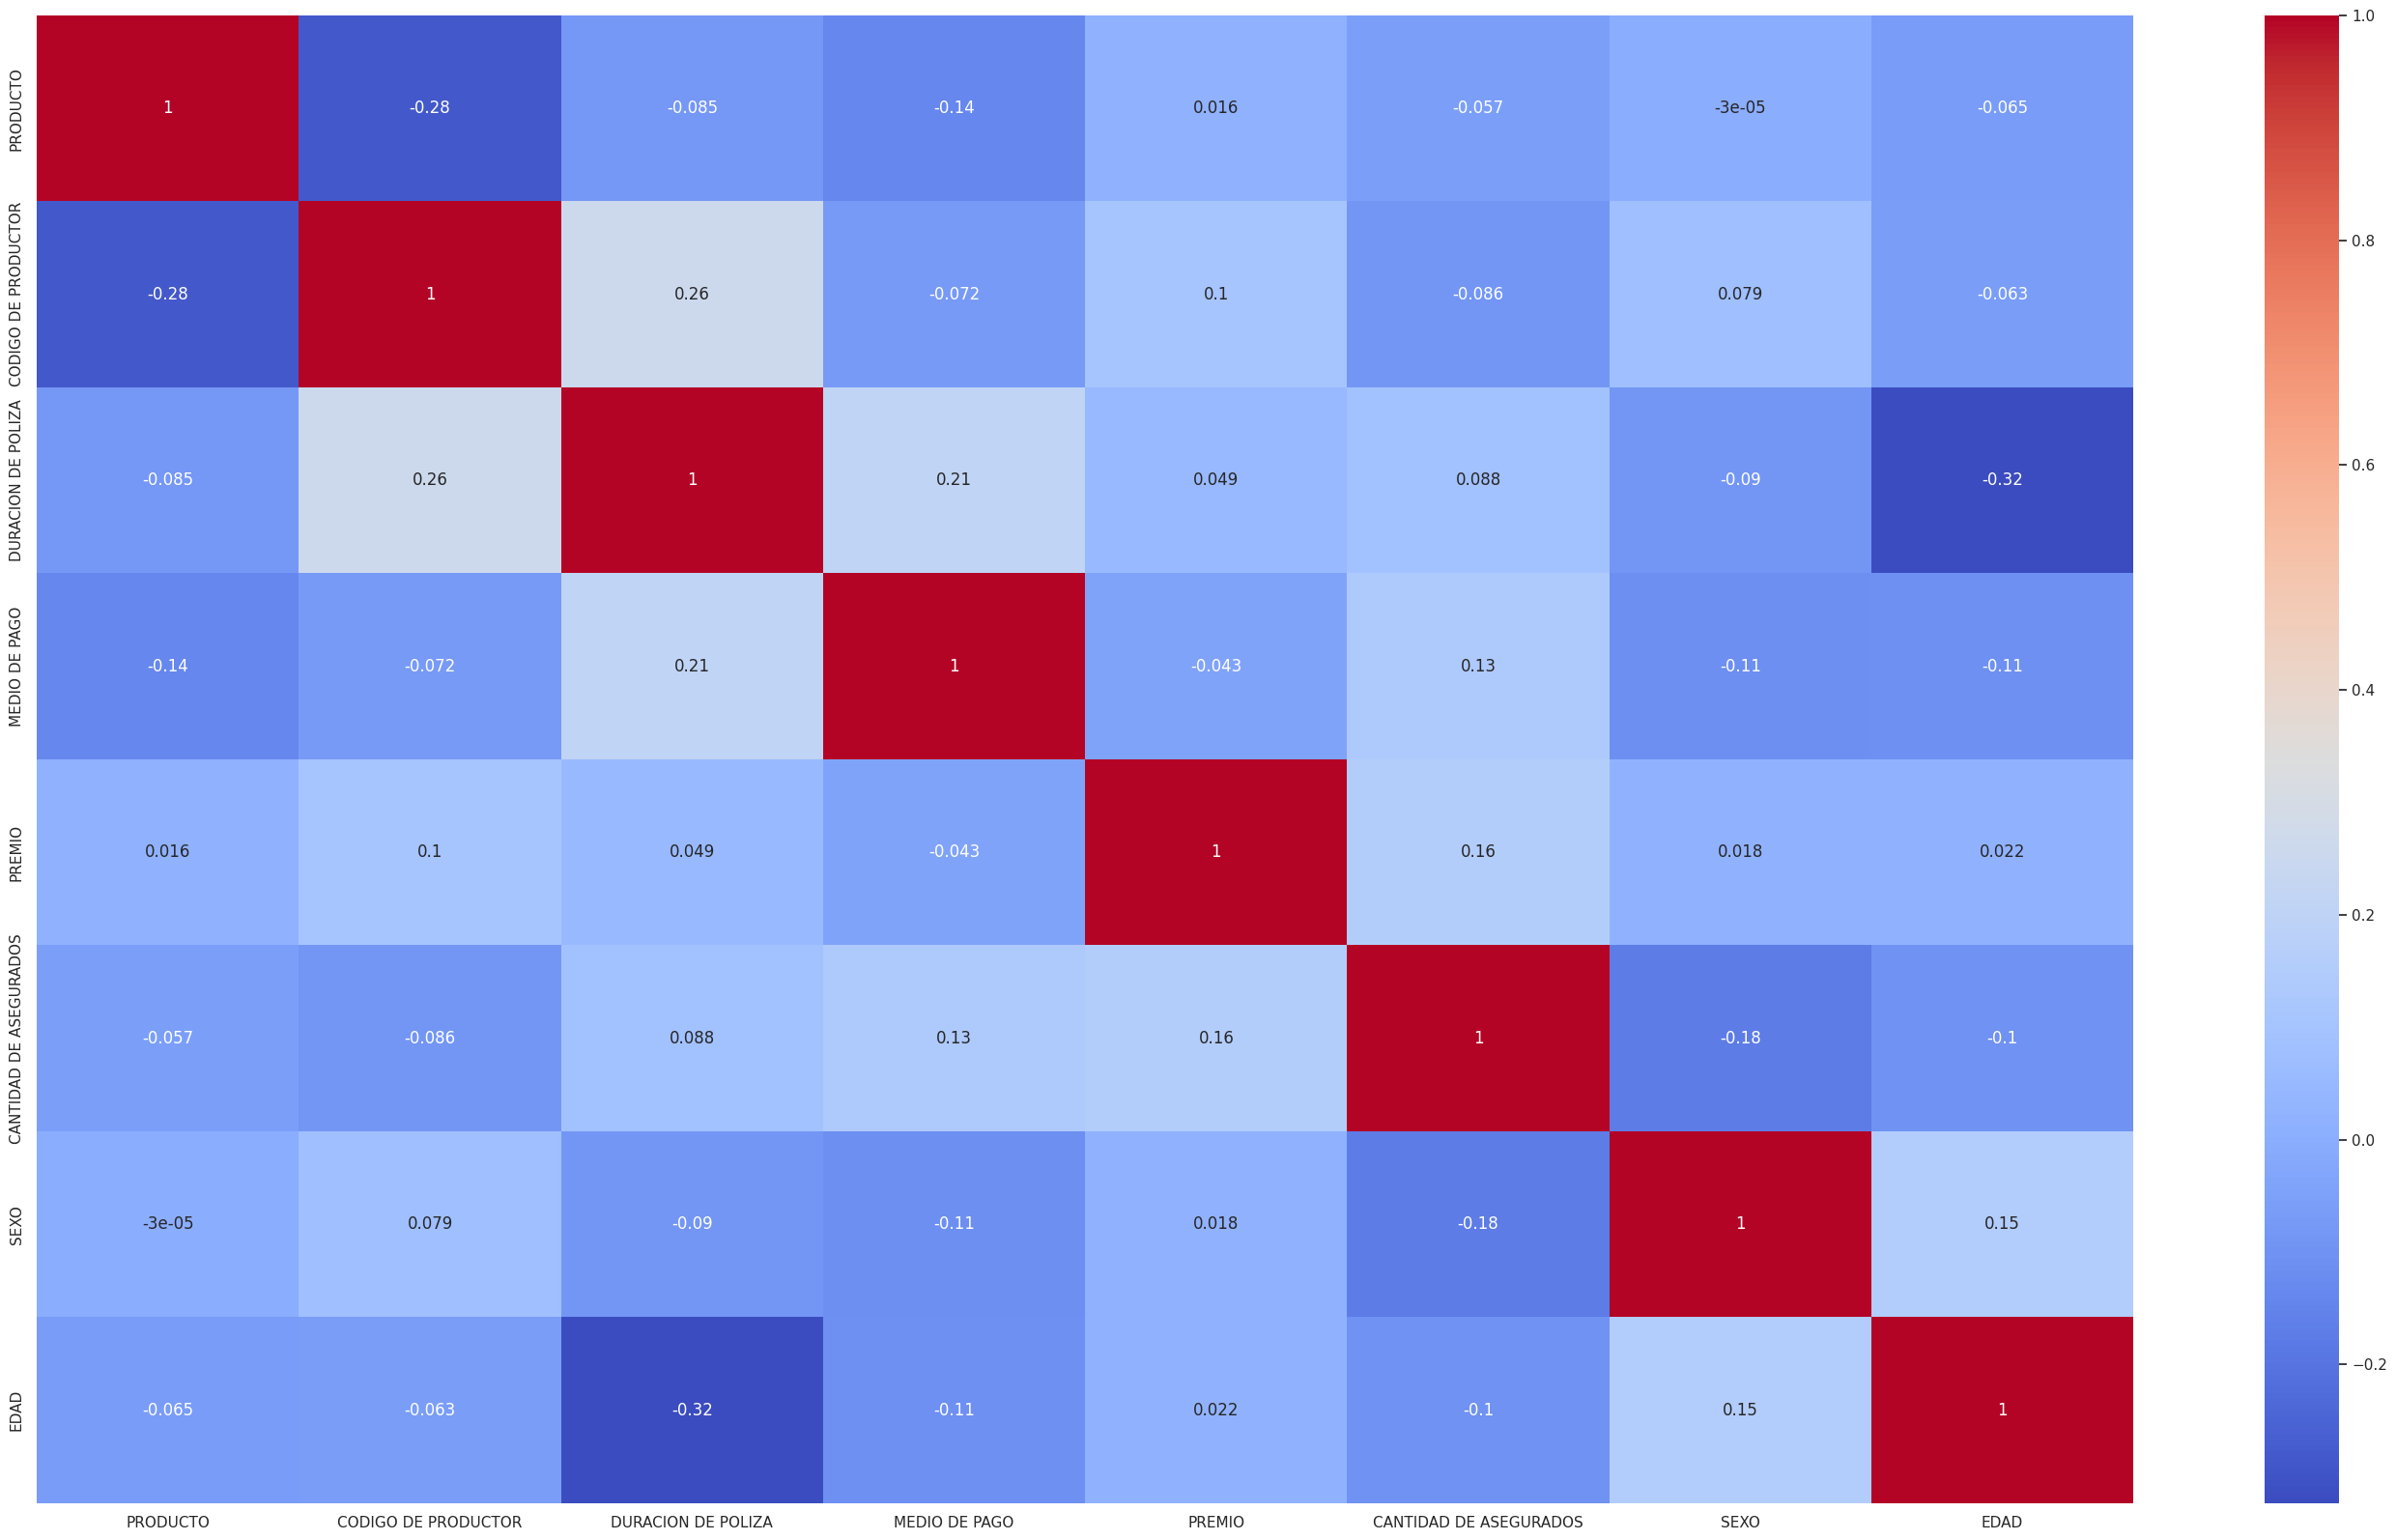

In [21]:
correlacion = df_a.corr()
sns.heatmap(correlacion, annot=True, cmap='coolwarm')

Analicemos el premio con la variable categórica de producto. Para reducir la muestra, busquemos los 6 productos con mas ventas

In [22]:
producto_ocurrencias = df_a['PRODUCTO'].value_counts().head(6)
producto_ocurrencias

171    42467
165    14171
131     4015
137     3918
303     2508
227     1986
Name: PRODUCTO, dtype: int64

Armemos un dataframe solo con estos 6 productos para llevalos a un boxplot. Vemos que estos 6 productos tiene un comportamiento cercano al promedio de premio, salvo el 137 que parece mas elevado

In [23]:
productos=[171,165,157,137,131,303]
df_producto=df_a[df_a['PRODUCTO'].isin(productos)].copy()

<Axes: xlabel='PRODUCTO', ylabel='PREMIO'>

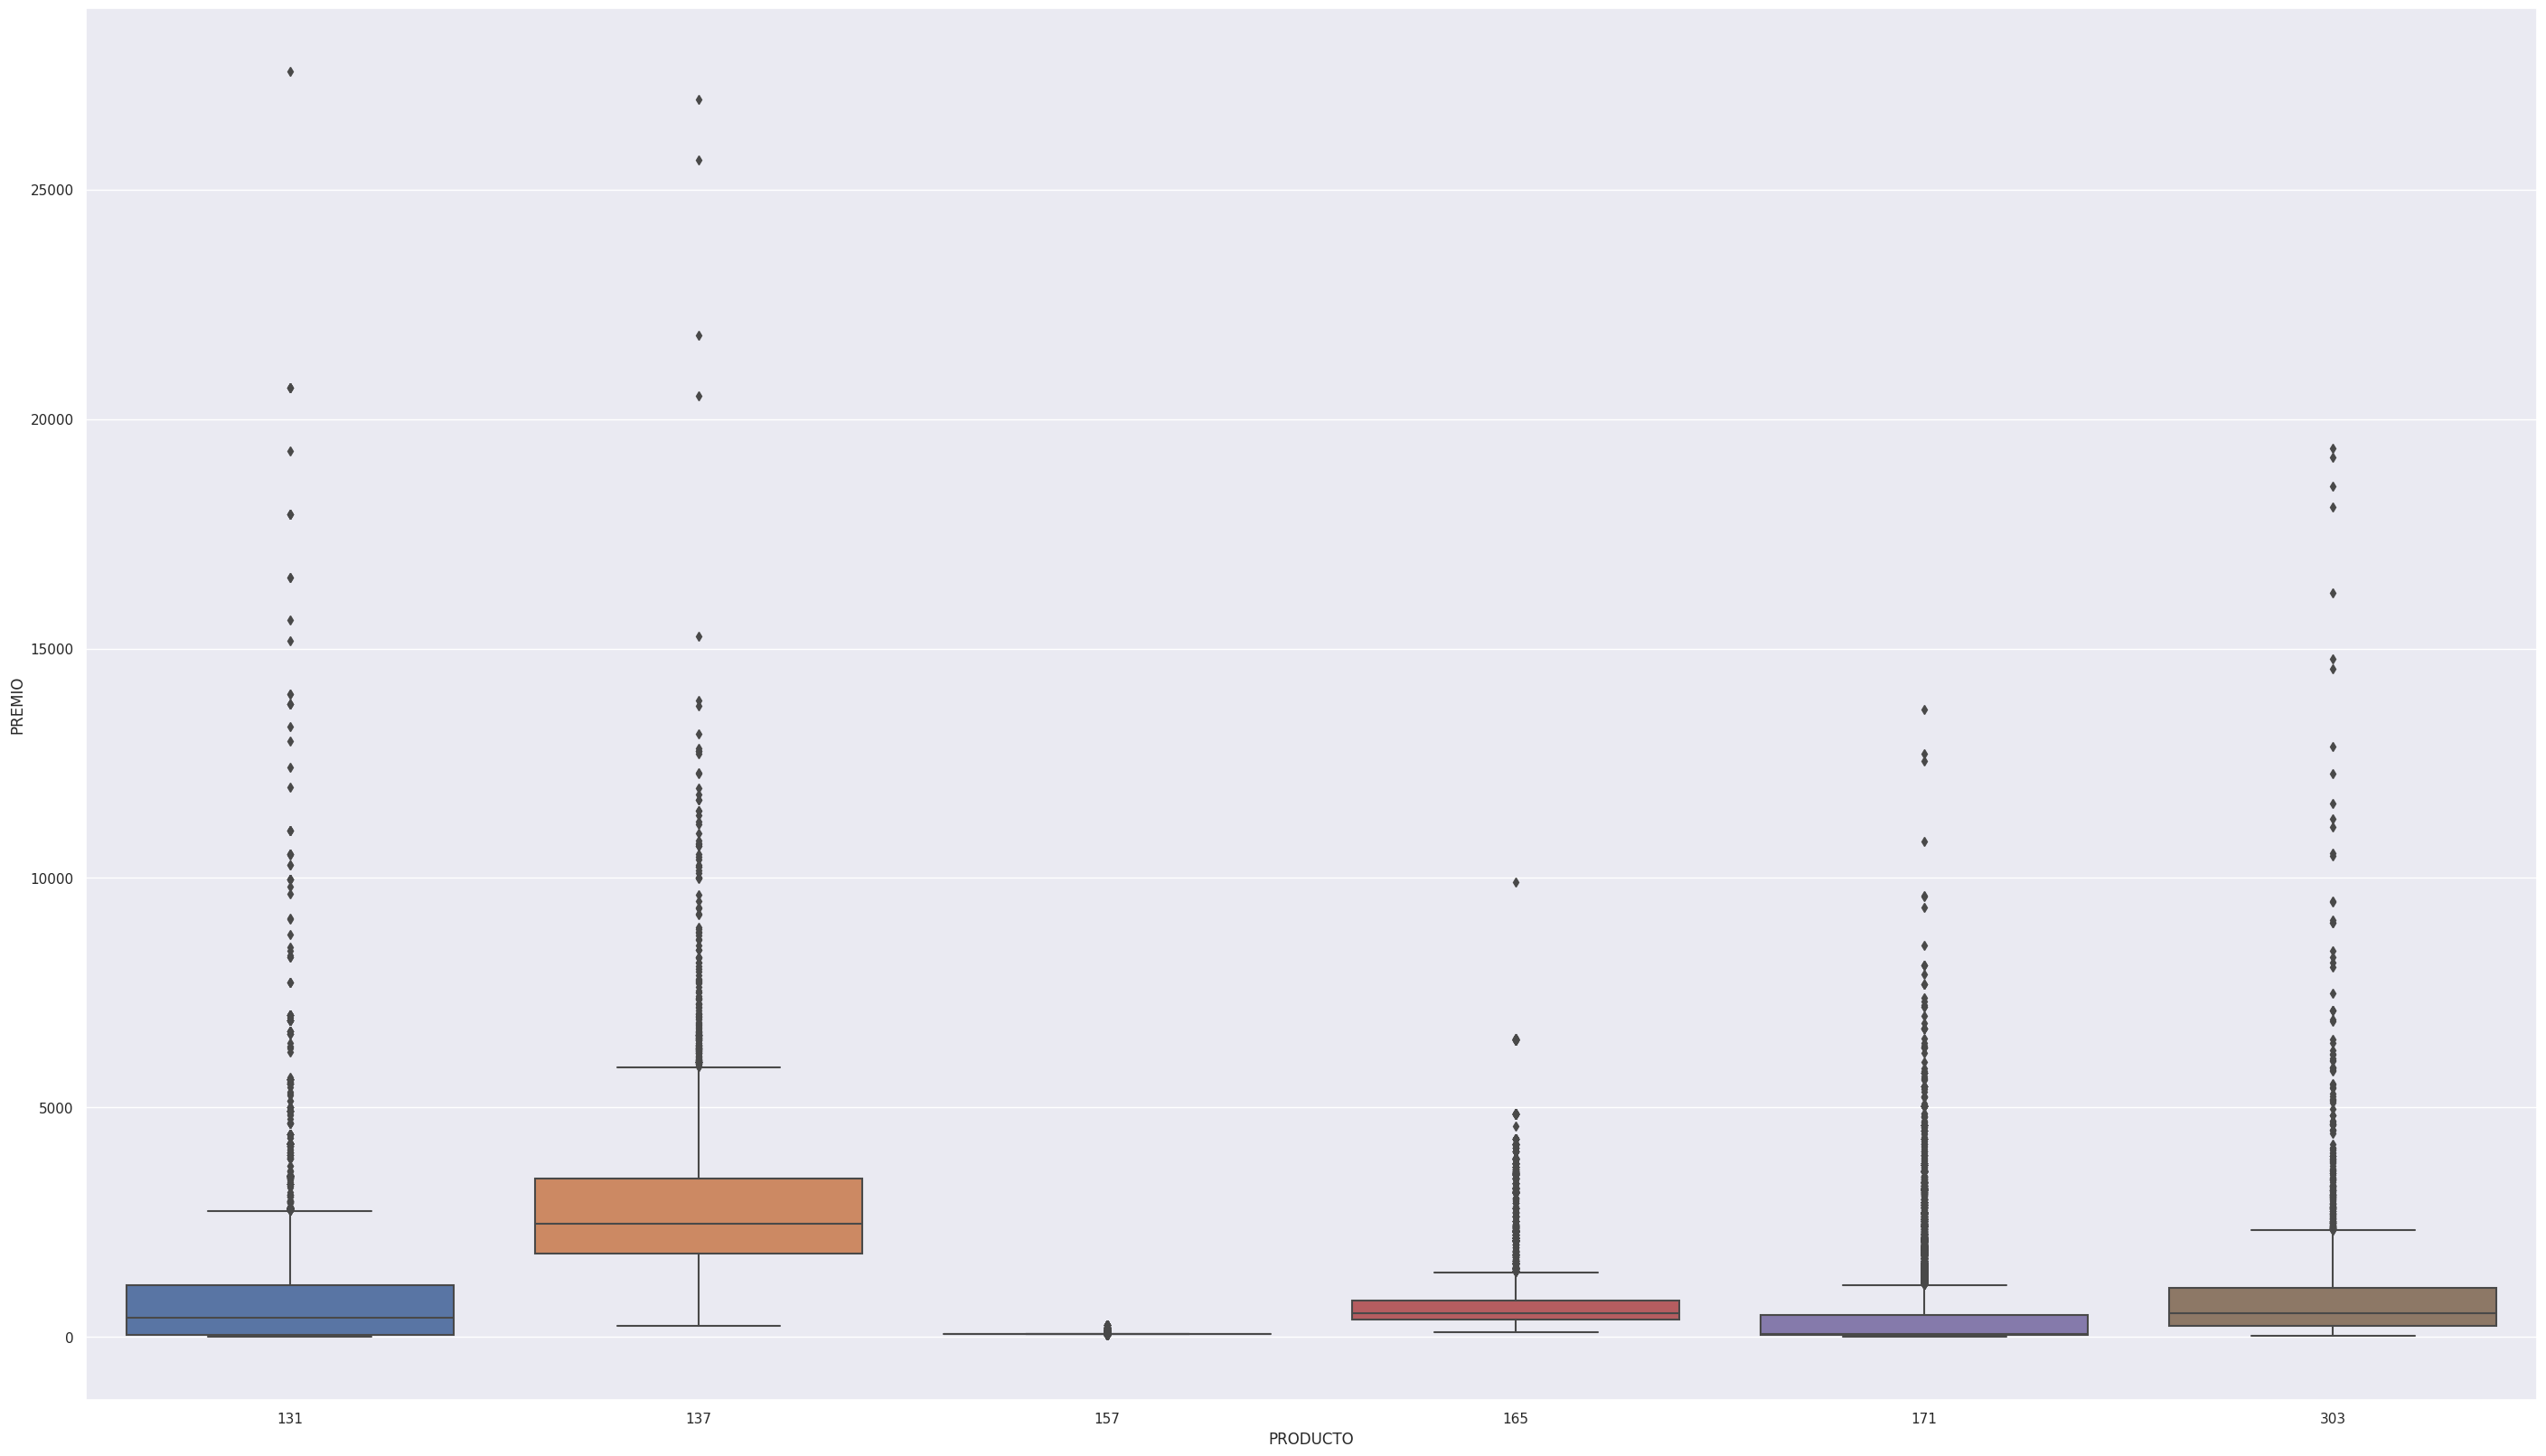

In [24]:
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x='PRODUCTO', y='PREMIO', data=df_producto)

Luego de este recorrido, vamos a realizar un modelo que pueda predecir el importe (premio) de una póliza a partir de estas variables que podemos considerar dependientes (en mayor o menor medida) de nuestro dataset.

- PRODUCTO
- CODIGO DE PRODUCTOR
- DURACION DE POLIZA
- MEDIO DE PAGO
- CANTIDAD DE ASEGURADOS
- SEXO
- EDAD

Efectivamente la edad y el sexo son factores claves, que se demuestran a lo largo de los gráficos realizados.
Durante este camino, las variables que en un principio había considerado, se mantienen, pero logré sumar tres variables más, que hacen más potente al modelo. En definitiva, este análisis me permitió chequear que no poseo datos nulos en estas variables, sumé variables a mi modelo y poseo el dataset limpio y definitivo para mi modelo.

**PARTE 3**

Vamos a seleccionar un modelo de feature selection para reducir nuestras variables independientes, que hasta el momento son siete.

Comenzamos separando nuestro dataset, para generar x e y.
Y será el premio o valor de la póliza, mientras que X tendrá al resto de las variables.

El método elegido es el Foward Selection tomando un k_features de 5. Con esto buscamos reducir de 7 a 5 variables, tomando las 5 más significativas

In [25]:
X = df_a.drop("PREMIO", 1)
Y = df_a['PREMIO']

<ipython-input-25-87b49d21dc00>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_a.drop("PREMIO", 1)


In [26]:
!pip install mlxtend

In [27]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [28]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

Aqui vemos las cinco variables más significativas con las que nos vamos a quedar

In [29]:
sfs.fit(X, Y)
sfs.k_feature_names_

('PRODUCTO',
 'CODIGO DE PRODUCTOR',
 'MEDIO DE PAGO',
 'CANTIDAD DE ASEGURADOS',
 'EDAD')

Voy a clonar mi DataFrame para mantener uno con las de 7 variables y luego voy a eliminar las variables Producto y Sexo sobre el dataframe que vengo trabajando

In [30]:
df7 = df_a.copy()

In [31]:
del df_a['DURACION DE POLIZA']

In [32]:
del df_a['SEXO']

In [33]:
df_a

,PRODUCTO,CODIGO DE PRODUCTOR,MEDIO DE PAGO,PREMIO,CANTIDAD DE ASEGURADOS,EDAD
0,125,1,5,2.20,1,99.00
1,125,1,5,2.20,1,100.00
2,125,1,5,2.31,1,101.00
3,157,343,5,71.29,1,97.00
4,157,343,5,71.27,1,98.00
...,...,...,...,...,...,...
78431,303,104,3,1041.94,1,18.00
78432,165,70,5,3240.28,1,17.00
78433,165,366,5,1445.08,1,17.00
78434,165,366,1,4207.04,1,17.00


En vistas de comenzar con nuestro modelo, vamos a hacer la division entre el dataset de entrenamiento y de prueba.

In [34]:
Xa = df_a.drop("PREMIO", 1)
Ya = df_a['PREMIO']

<ipython-input-34-5eca89a28517>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Xa = df_a.drop("PREMIO", 1)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xa,Ya, test_size = 0.15)

Aplicamos el modelo de regresion lineal de la libreria sklearn

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 604.3384720857523


In [39]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 5011433.29351067


In [40]:
import numpy as np
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 2238.6230798217616


In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.09922345683670597


Vamos a probar con otro modelo de sklearn, Random Forest,  para ver si podemos aumentar la fiabilidad ya que los resultados son muy pobres.

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [44]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
y_pred1 = model.predict(X_test)

In [46]:
print("MAE",mean_absolute_error(y_test,y_pred1))

MAE 318.51980462631167


In [47]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

RMSE 1369.6530750856323


In [48]:
r2 = r2_score(y_test,y_pred1)
print(r2)

0.6628087718008293


El modelo de regresion de random forest tiene mucha mejor fiabilidad que el de regresion lineal pero sin embargo no es lo suficientemente fiable.

Vamos a intentar mejorar el Random Forest realizando un Hypertuning del mismo, intentando usar la herramienta de Grid Search, ya que en la ejecucion que hicimos utilizamos solo los hiperparametros de default. El problema es que la ejecución del Grid Search me ha sido imposible ya que no finaliza nunca. Teniendo eso en cuenta, haremos pruebas con algunos parámetros para ver como salen los modelos.

Instancio un Random Forest con los hiperparámetros que usaremos para mejorar resultados.

In [49]:
random_forest_nuevo = RandomForestRegressor(criterion='friedman_mse',max_depth=10, max_features= 5, n_estimators=200)

Entreno mi nuevo modelo

In [50]:
random_forest_nuevo.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=10, max_features=5,
                      n_estimators=200)

Predecimos con el dataframe de prueba

In [51]:
y_predhyp = random_forest_nuevo.predict(X_test)

Analizamos MAE y RMSE sobre este modelo

In [52]:
print("MAE",mean_absolute_error(y_test,y_predhyp))

MAE 332.67069431963074


In [53]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_predhyp)))

RMSE 1368.2935933955102


Analizamos r2 para ver la efectividad del modelo

In [54]:
r21 = r2_score(y_test,y_predhyp)
print(r21)

0.6634778139234025


Vemos en grilla comparaciones de resultados

In [55]:
dft = pd.DataFrame({'Valor Real': y_test, 'Valor Predecido por modelo': y_predhyp})
dft['Sesgo']=dft['Valor Real'] -dft['Valor Predecido por modelo']
dft['Error_porc']=((dft['Valor Real'] -dft['Valor Predecido por modelo'])/(dft['Valor Real'])) *100
dft

,Valor Real,Valor Predecido por modelo,Sesgo,Error_porc
77751,59.32,53.01,6.31,10.64
24018,210.56,471.11,-260.55,-123.74
3438,190.11,597.09,-406.98,-214.08
57062,60.00,44.64,15.36,25.60
23635,999.41,1043.26,-43.85,-4.39
...,...,...,...,...
47463,2699.88,1205.03,1494.85,55.37
51556,5459.83,3292.10,2167.73,39.70
32186,539.96,471.11,68.85,12.75
42724,31.32,52.21,-20.89,-66.71


Voy a probar con este dataset de 5 variables un modelo de KNN a ver si es mejor que el Random Forest

In [56]:
from sklearn.neighbors import KNeighborsRegressor
k = 200
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=200)

In [57]:
y_predknn = knn_regressor.predict(X_test)

Vemos R2 con este modelo

In [58]:
r7knn = r2_score(y_test,y_predknn)
print(r7knn)

0.11494088530513935


Realmente no estamos obteniendo resultados favorables con ninguno de los modelos que tenemos sobre nuestro dataset.
Por ultimo, vamos a reducir nuestro dataset para eliminar mas outliers y aplicar el modelo de random forest tuneado y el KNN son los de mejor resultado hasta el momento.

In [59]:
percentile_10 = df_a['PREMIO'].quantile(0.10)
percentile_90 = df_a['PREMIO'].quantile(0.90)

df_ared = df_a[(df_a['PREMIO'] >= percentile_10) & (df_a['PREMIO'] <= percentile_90)]

In [60]:
df_ared

,PRODUCTO,CODIGO DE PRODUCTOR,MEDIO DE PAGO,PREMIO,CANTIDAD DE ASEGURADOS,EDAD
3,157,343,5,71.29,1,97.00
4,157,343,5,71.27,1,98.00
5,157,343,5,71.86,1,99.00
11,164,337,5,171.12,1,97.00
12,164,337,5,235.72,1,98.00
...,...,...,...,...,...,...
78429,303,366,1,456.02,1,18.00
78430,227,104,3,72.00,1,18.00
78431,303,104,3,1041.94,1,18.00
78433,165,366,5,1445.08,1,17.00


In [61]:
Xared = df_ared.drop('PREMIO', 1)
Yared = df_ared['PREMIO']

<ipython-input-61-a8a3cb231b9d>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Xared = df_ared.drop('PREMIO', 1)


Vamos con RandomForest

In [62]:
from sklearn.model_selection import train_test_split
Xared_train, Xared_test, yared_train, Yared_test = train_test_split(Xared,Yared, test_size = 0.15)

In [63]:
random_forest_ared = RandomForestRegressor(criterion='friedman_mse',max_depth=10, max_features= 8, n_estimators=200)

In [64]:
random_forest_ared.fit(Xared_train,yared_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=10, max_features=8,
                      n_estimators=200)

In [65]:
y_predared = random_forest_ared.predict(Xared_test)

Evaluemos MAE RSME y R2

In [66]:
MAERF5=mean_absolute_error(Yared_test,y_predared)
print(MAERF5)

158.2955884132324


In [67]:
RMSERF5=np.sqrt(mean_squared_error(Yared_test,y_predared))
print(RMSERF5)

251.7966758161072


In [68]:
rared = r2_score(Yared_test,y_predared)
print(rared)

0.6432991643986585


Vamos a observar los resultados en tabla

In [69]:
dftr = pd.DataFrame({'Valor Real': Yared_test, 'Valor Predecido por modelo': y_predared})
dftr['Sesgo']=dftr['Valor Real'] -dftr['Valor Predecido por modelo']
dftr['Error_porc']=((dftr['Valor Real'] -dftr['Valor Predecido por modelo'])/(dftr['Valor Real'])) *100
dftr

,Valor Real,Valor Predecido por modelo,Sesgo,Error_porc
27436,1598.24,874.84,723.40,45.26
24500,999.41,1024.03,-24.62,-2.46
54573,813.48,735.61,77.87,9.57
48396,60.00,52.24,7.76,12.94
26543,375.10,953.06,-577.96,-154.08
...,...,...,...,...
48016,718.88,585.49,133.39,18.56
32550,189.45,470.16,-280.71,-148.17
46087,33.49,54.12,-20.63,-61.59
12149,580.24,697.41,-117.17,-20.19


KNN

In [70]:
k = 200
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(Xared_train,yared_train)

KNeighborsRegressor(n_neighbors=200)

In [71]:
y_predredknn = knn_regressor.predict(Xared_test)

In [72]:
MAEKNN5=mean_absolute_error(Yared_test,y_predredknn)
print(MAEKNN5)

188.4254386179296


In [73]:
RMSEKNN5=np.sqrt(mean_squared_error(Yared_test,y_predredknn))
print(RMSEKNN5)

285.68911008305525


In [74]:
r7knnred = r2_score(Yared_test,y_predredknn)
print(r7knnred)

0.540810959110585


Nosotros más arriba hicimos una copia de nuestro dataset con 7 variables, previo a que lo reduzcamnos a 5.
Vamos a analizar ese dataset, realizando estos pasos:
- Reducir los outliers tal como hicimos con el de 5 variables
- Aplicar modelo de randomforest tuneado
- Aplicar KNN

Veremos con esto cuál de los dos modelos se comporta mejor y compararemos la performance con el de 5 variables.

In [75]:
df7

,PRODUCTO,CODIGO DE PRODUCTOR,DURACION DE POLIZA,MEDIO DE PAGO,PREMIO,CANTIDAD DE ASEGURADOS,SEXO,EDAD
0,125,1,12,5,2.20,1,2,99.00
1,125,1,12,5,2.20,1,2,100.00
2,125,1,12,5,2.31,1,2,101.00
3,157,343,12,5,71.29,1,1,97.00
4,157,343,12,5,71.27,1,2,98.00
...,...,...,...,...,...,...,...,...
78431,303,104,12,3,1041.94,1,1,18.00
78432,165,70,12,5,3240.28,1,1,17.00
78433,165,366,12,5,1445.08,1,1,17.00
78434,165,366,12,1,4207.04,1,2,17.00


Reducimos outliers sobre este DF

In [76]:
percentile_10red = df7['PREMIO'].quantile(0.10)
percentile_90red = df7['PREMIO'].quantile(0.90)

df_7red = df7[(df7['PREMIO'] >= percentile_10red) & (df7['PREMIO'] <= percentile_90red)]

In [77]:
df_7red

,PRODUCTO,CODIGO DE PRODUCTOR,DURACION DE POLIZA,MEDIO DE PAGO,PREMIO,CANTIDAD DE ASEGURADOS,SEXO,EDAD
3,157,343,12,5,71.29,1,1,97.00
4,157,343,12,5,71.27,1,2,98.00
5,157,343,12,5,71.86,1,1,99.00
11,164,337,12,5,171.12,1,2,97.00
12,164,337,12,5,235.72,1,2,98.00
...,...,...,...,...,...,...,...,...
78429,303,366,12,1,456.02,1,1,18.00
78430,227,104,12,3,72.00,1,1,18.00
78431,303,104,12,3,1041.94,1,1,18.00
78433,165,366,12,5,1445.08,1,1,17.00


Vamos a dividir nuestro dataframe para obtener las secciones de entrenamiento y prueba

In [78]:
X7red = df_7red.drop('PREMIO',1)
Y7red = df_7red['PREMIO']

<ipython-input-78-185f01e79582>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X7red = df_7red.drop('PREMIO',1)


In [79]:
X7red_train, X7red_test, y7red_train, Y7red_test = train_test_split(X7red,Y7red, test_size = 0.15)

Vamos con RandomForest Tuneado. Lo instanciamos, lo entrenamos, predecimos y observamos R2

In [80]:
random_forest_7red = RandomForestRegressor(criterion='friedman_mse',max_depth=10, max_features= 8, n_estimators=200)

In [81]:
random_forest_7red.fit(X7red_train,y7red_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=10, max_features=8,
                      n_estimators=200)

In [82]:
y_pred7redrf = random_forest_7red.predict(X7red_test)

Analicemos metricas

In [83]:
MAERF7=mean_absolute_error(Y7red_test,y_pred7redrf)
print(MAERF7)

139.78718072230916


In [84]:
RMSERF7=np.sqrt(mean_squared_error(Y7red_test,y_pred7redrf))
print(RMSERF7)

234.38520378628644


In [85]:
r7redrf = r2_score(Y7red_test,y_pred7redrf)
print(r7redrf)

0.6848214930718248


KNN

In [86]:
k = 200
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X7red_train,y7red_train)

KNeighborsRegressor(n_neighbors=200)

In [87]:
y_predredknn7 = knn_regressor.predict(X7red_test)

Analicemos metricas

In [88]:
MAEKNN7=mean_absolute_error(Y7red_test,y_predredknn7)
print(MAEKNN7)

185.05849699573105


In [89]:
RMSEKNN7=np.sqrt(mean_squared_error(Y7red_test,y_predredknn7))
print(RMSEKNN7)

279.40371277508655


In [90]:
r7knnred7 = r2_score(Y7red_test,y_predredknn7)
print(r7knnred7)

0.5521211492743303


**Evaluando Modelos ML (Parte 1)**

Los modelos de regresión que utilicé (lineal, random forest, knn) no tuvieron los mejores resultados, por lo que decidí quedarme con el que mejor se había comportado, aunque con malos resultados, que fue el RandomForest y lo que decidí hacer fue tocar mi dataframe para eliminar outliers que pueden estar complicando el entrenamiento. Con eso mejoró muchisimo la performance.
En todos los casos me valí de MAE, RMSE y R2 que creo que son métricas suficientes para poder analizar la efectividad de un modelo.
Todo lo anterior dicho fue analizado con un DataFrame de 5 variables independientes, obteniendo mejores resultados con RandomForest.

Lo que hicimos luego fue ampliar la cantidad de variables independientes a 7 y aplicar los dos modelos que mejor se habían comportado (knn y RF). Lo que se puede observar es que los resultados son apenas mejores aumentando a 7 las variables, no mostrando una diferencia significativa con el de 5, pero al ser mejor nos vamos a quedar entonces con el modelo Randomforest Tuneado de 7 variables.

In [91]:
data = {
    'Modelo': ['Random forest Tuneado con 5 variables', 'KNN con 5 variables',  'Random forest Tuneado con 7 variables','KNN con 7 variables'],
    'MAE': [MAERF5, MAEKNN5, MAERF7,MAEKNN7],
    'RMSE': [RMSERF5,RMSEKNN5,RMSERF7,RMSEKNN7],
    'R2': [rared, r7knnred,r7redrf,r7knnred7]}
dfdata = pd.DataFrame(data)
print(dfdata)

                                  Modelo    MAE   RMSE   R2
0  Random forest Tuneado con 5 variables 158.30 251.80 0.64
1                    KNN con 5 variables 188.43 285.69 0.54
2  Random forest Tuneado con 7 variables 139.79 234.39 0.68
3                    KNN con 7 variables 185.06 279.40 0.55


Con el fin de generar nuevas variables sintéticas, permitiendo reducir la dimensionalidad sin perder la eficiencia, aplicamos un PCA sobre nuestro conjunto de 7 variables independientes

Estandarizamos las variables para el PCA

In [92]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_trainpca = sc.fit_transform((X7red_train))
X_testpca = sc.transform(X7red_test)

Aplicamos PCA sin parámetros para analizar la variablidad de cada variable.

In [93]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_trainpca)
X_test = pca.transform(X_testpca)

Observamos que la mayoría de las variables acumulan una variablidad considerable. Si bien las dos primeras cumulan más de un 40%, las cuatro siguientes superan el 10% cada una.

In [94]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.24407089, 0.17137934, 0.1539459 , 0.13289595, 0.11308028,
       0.10267596, 0.08195167])

Para intentar reducir en algo la dimensionalidad, vamos a tomar un PCA a 6 variables en lugar de las 7 originales, reduciendo en 1 la dimensionalidad.

In [95]:
pca = PCA(n_components =6)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [96]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.24407089, 0.17137934, 0.1539459 , 0.13289595, 0.11308028,
       0.10267596])

In [97]:
random_forest_pca = RandomForestRegressor(criterion='friedman_mse',max_depth=10, max_features= 8, n_estimators=200)

In [98]:
random_forest_pca.fit(X_train,y7red_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=10, max_features=8,
                      n_estimators=200)

In [99]:
y_predpca = random_forest_pca.predict(X_test)

In [100]:
r2pca = r2_score(Y7red_test,y_predpca)
print(r2pca)

0.628087192036459


Observamos que al reducir una dimensión, se pierde un poco de eficacia en el modelo pero no es tanto, pasa de 0,69 a 0,62

Aplicacion de Validación Cruzada.
Vamos a tomar nuestro modelo que mejor performace tuvo (random forest con 7 parámetros tuneado) y sobre él vamos a aplicar Stratifield K-fold con 10 iteraciones para intentar validar nuestro modelo

In [101]:
#nuestro Dataframe más arriba estaba dividio asi en X e y con las variables X7red y Y7red
from sklearn.model_selection import cross_val_score
modelcrossval = RandomForestRegressor(criterion='friedman_mse',max_depth=10, max_features= 8, n_estimators=200)
scores = cross_val_score(modelcrossval, X7red, Y7red, cv=10, verbose=1,scoring='r2')

In [102]:
print("%0.2f de r2 promedio con una desviacion estandar de %0.2f" % (scores.mean(), scores.std()))

0.58 de r2 promedio con una desviacion estandar de 0.21


Mi modelo se comporta con una performance peor al aumentar la cantidad de datos de prueba en esta validación cruzada. Quiero analizar el sesgo y la varianza de mi modelo elegido, con la prueba realizada que mejor performance tuvo

In [103]:
mse = np.mean((y_pred7redrf - Y7red_test) ** 2)
print(f"MSE: {mse}")

MSE: 54936.42375393902


In [104]:
num_ejecuciones = 10

# Almacenar los errores cuadráticos medios (MSE) en cada ejecución
mse_list = []

for _ in range(num_ejecuciones):
    # Dividir los datos en conjuntos de entrenamiento y prueba de forma aleatoria
    X_train, X_test, y_train, y_test = train_test_split(X7red, Y7red, test_size=0.2)

    # Crear y entrenar un modelo de regresión lineal
    model = RandomForestRegressor(criterion='friedman_mse',max_depth=10, max_features= 8, n_estimators=200)
    model.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el MSE en esta ejecución
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Calcular el sesgo y la varianza promedio
bias = np.mean(mse_list)
variance = np.var(mse_list)

print(f"Sesgo (Bias): {bias}")
print(f"Varianza: {variance}")

Sesgo (Bias): 54335.40183663174
Varianza: 1656887.1069497622


Por los resultados puedo concluir que el Bias no es muy alto, pero si es muy alta la varianza, o sea que segun como varíen mis casos de prueba, va a variar la efectividad del proyecto.
Estimo que estoy frente a un caso de Overfitting con mi modelo de RandomForest tuneado.